## 🔧 Configuración del Entorno Kedro

Cargamos el contexto de Kedro para acceder a los datos procesados por nuestros pipelines.

In [35]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')  # Cambio: seaborn-v0_8 puede no estar disponible
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Librerías cargadas exitosamente")

✅ Librerías cargadas exitosamente


In [36]:
# Cargar contexto de Kedro
try:
    import os
    from kedro.framework.session import KedroSession
    from kedro.framework.startup import bootstrap_project

    # Cambiar al directorio padre del proyecto
    original_dir = os.getcwd()
    project_path = os.path.dirname(os.getcwd())  # Subir un nivel desde notebooks/
    os.chdir(project_path)
    
    bootstrap_project(project_path)
    session = KedroSession.create()
    context = session.load_context()
    catalog = context.catalog
    
    print("✅ Contexto Kedro cargado exitosamente")
    # Usar la sintaxis correcta para versiones nuevas de Kedro
    try:
        datasets = list(catalog.list())
        print(f"Datasets disponibles: {len(datasets)}")
    except:
        print("Catálogo de datos configurado")
        
    # Regresar al directorio original
    os.chdir(original_dir)
    
except Exception as e:
    print(f"⚠️ Error cargando Kedro: {e}")
    print("Continuando sin contexto Kedro...")
    catalog = None

[09/24/25 20:41:40] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=536588;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=600550;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

✅ Contexto Kedro cargado exitosamente
Catálogo de datos configurado


## 📊 2.1 Recolección de Datos Iniciales

### Cargar datasets raw desde el catálogo de Kedro

In [37]:
# Cargar datos raw desde Kedro catalog
if catalog is not None:
    try:
        df_2020 = catalog.load("raw_covid_2020")
        df_2021 = catalog.load("raw_covid_2021") 
        df_2022 = catalog.load("raw_covid_2022")
        
        print("✅ Datasets raw cargados exitosamente")
        print(f"Dataset 2020: {df_2020.shape}")
        print(f"Dataset 2021: {df_2021.shape}")
        print(f"Dataset 2022: {df_2022.shape}")
        
    except Exception as e:
        print(f"❌ Error cargando datos: {e}")
        print("Ejecute primero: kedro run --pipeline=data_engineering")
        # Fallback: crear datos de ejemplo
        df_2020 = pd.DataFrame()
        df_2021 = pd.DataFrame()
        df_2022 = pd.DataFrame()
else:
    print("❌ Catálogo no disponible. Creando datos de ejemplo...")
    # Crear datos de ejemplo para demostración
    dates_2020 = pd.date_range('2020-01-01', '2020-12-31', freq='D')
    df_2020 = pd.DataFrame({
        'date': dates_2020,
        'location_key': 'CL',
        'new_confirmed': np.random.poisson(100, len(dates_2020)),
        'new_deceased': np.random.poisson(5, len(dates_2020)),
        'cumulative_confirmed': np.cumsum(np.random.poisson(100, len(dates_2020))),
        'cumulative_deceased': np.cumsum(np.random.poisson(5, len(dates_2020)))
    })
    
    dates_2021 = pd.date_range('2021-01-01', '2021-12-31', freq='D')
    df_2021 = pd.DataFrame({
        'date': dates_2021,
        'location_key': 'CL',
        'new_confirmed': np.random.poisson(150, len(dates_2021)),
        'new_deceased': np.random.poisson(7, len(dates_2021)),
        'cumulative_confirmed': np.cumsum(np.random.poisson(150, len(dates_2021))),
        'cumulative_deceased': np.cumsum(np.random.poisson(7, len(dates_2021)))
    })
    
    dates_2022 = pd.date_range('2022-01-01', '2022-12-31', freq='D')
    df_2022 = pd.DataFrame({
        'date': dates_2022,
        'location_key': 'CL', 
        'new_confirmed': np.random.poisson(80, len(dates_2022)),
        'new_deceased': np.random.poisson(3, len(dates_2022)),
        'cumulative_confirmed': np.cumsum(np.random.poisson(80, len(dates_2022))),
        'cumulative_deceased': np.cumsum(np.random.poisson(3, len(dates_2022)))
    })
    
    print("✅ Datos de ejemplo creados")
    print(f"Dataset 2020: {df_2020.shape}")
    print(f"Dataset 2021: {df_2021.shape}")
    print(f"Dataset 2022: {df_2022.shape}")

[09/24/25 20:41:42] INFO     Loading data from raw_covid_2020 (CSVDataset)...                  ]8;id=275539;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=425569;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from raw_covid_2021 (CSVDataset)...                  ]8;id=483554;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=366307;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from raw_covid_2022 (CSVDataset)...                  ]8;id=800095;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=697308;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

✅ Datasets raw cargados exitosamente
Dataset 2020: (33253, 11)
Dataset 2021: (36330, 12)
Dataset 2022: (29610, 11)


In [38]:
# Cargar datos procesados (limpios e integrados) si están disponibles
if catalog is not None:
    try:
        df_complete = catalog.load("primary_covid_complete")
        df_national = catalog.load("primary_covid_national")
        
        print("✅ Datos procesados cargados exitosamente")
        print(f"Dataset completo: {df_complete.shape}")
        print(f"Dataset nacional: {df_national.shape}")
        
    except Exception as e:
        print(f"⚠️ Datos procesados no disponibles: {e}")
        print("Usando datos raw para análisis.")
        df_complete = None
        df_national = None
else:
    df_complete = None
    df_national = None

                    INFO     Loading data from primary_covid_complete (CSVDataset)...          ]8;id=484815;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=364923;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from primary_covid_national (CSVDataset)...          ]8;id=704010;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=900071;file://C:\Users\cmuru\OneDrive\Escritorio\datos_covid\spaceflights\kedro-env\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

✅ Datos procesados cargados exitosamente
Dataset completo: (99193, 15)
Dataset nacional: (727, 21)


## 📈 2.2 Descripción Estructural de los Datos

### Análisis de la estructura de cada dataset

In [39]:
def analizar_estructura_dataset(df, nombre):
    """
    Analiza la estructura de un dataset y muestra información detallada.
    """
    print(f"\n{'='*60}")
    print(f"📊 ANÁLISIS DE ESTRUCTURA - {nombre.upper()}")
    print(f"{'='*60}")
    
    if df.empty:
        print("❌ Dataset vacío")
        return pd.DataFrame()
    
    # Información básica
    print(f"\n🔍 Información Básica:")
    print(f"   • Filas: {df.shape[0]:,}")
    print(f"   • Columnas: {df.shape[1]}")
    print(f"   • Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Tipos de datos
    print(f"\n📋 Tipos de Datos:")
    tipos = df.dtypes.value_counts()
    for tipo, cantidad in tipos.items():
        print(f"   • {tipo}: {cantidad} columnas")
    
    # Columnas
    print(f"\n📝 Columnas ({len(df.columns)}):")
    for i, col in enumerate(df.columns, 1):
        tipo = df[col].dtype
        nulls = df[col].isnull().sum()
        pct_null = (nulls / len(df)) * 100 if len(df) > 0 else 0
        print(f"   {i:2d}. {col:<25} | {str(tipo):<12} | Nulls: {nulls:>6} ({pct_null:5.1f}%)")
    
    # Rango temporal (si existe columna date)
    if 'date' in df.columns and len(df) > 0:
        print(f"\n📅 Rango Temporal:")
        try:
            # Intentar múltiples formatos de fecha
            try:
                date_col = pd.to_datetime(df['date'], format='%Y-%m-%d')
            except:
                try:
                    date_col = pd.to_datetime(df['date'], format='%d-%m-%Y')
                except:
                    date_col = pd.to_datetime(df['date'], infer_datetime_format=True)
            
            print(f"   • Fecha inicio: {date_col.min()}")
            print(f"   • Fecha fin: {date_col.max()}")
            print(f"   • Días únicos: {date_col.nunique()}")
            print(f"   • Periodo: {(date_col.max() - date_col.min()).days} días")
        except Exception as e:
            print(f"   • Error procesando fechas: {e}")
    
    # Ubicaciones únicas
    if 'location_key' in df.columns and len(df) > 0:
        print(f"\n🗺️ Ubicaciones:")
        locations = df['location_key'].nunique()
        print(f"   • Ubicaciones únicas: {locations}")
        if locations <= 10:
            print(f"   • Lista: {df['location_key'].unique().tolist()}")
    
    return df.describe(include='all') if not df.empty else pd.DataFrame()

# Analizar cada dataset
desc_2020 = analizar_estructura_dataset(df_2020, "COVID 2020")
desc_2021 = analizar_estructura_dataset(df_2021, "COVID 2021")  
desc_2022 = analizar_estructura_dataset(df_2022, "COVID 2022")


📊 ANÁLISIS DE ESTRUCTURA - COVID 2020

🔍 Información Básica:
   • Filas: 33,253
   • Columnas: 11
   • Memoria: 6.03 MB

📋 Tipos de Datos:
   • float64: 8 columnas
   • object: 2 columnas
   • int64: 1 columnas

📝 Columnas (11):
    1. date                      | object       | Nulls:      0 (  0.0%)
    2. location_key              | object       | Nulls:      0 (  0.0%)
    3. new_confirmed             | float64      | Nulls:    346 (  1.0%)
    4. new_deceased              | float64      | Nulls:   8967 ( 27.0%)
    5. new_recovered             | float64      | Nulls:  32949 ( 99.1%)
    6. new_tested                | float64      | Nulls:  28738 ( 86.4%)
    7. cumulative_confirmed      | float64      | Nulls:      0 (  0.0%)
    8. cumulative_deceased       | float64      | Nulls:   8605 ( 25.9%)
    9. cumulative_recovered      | float64      | Nulls:  33161 ( 99.7%)
   10. cumulative_tested         | float64      | Nulls:  28085 ( 84.5%)
   11. year                      | int64

### Comparación entre datasets

In [40]:
# Crear tabla comparativa de los 3 datasets
if not df_2020.empty and not df_2021.empty and not df_2022.empty:
    # Función auxiliar para obtener periodo
    def obtener_periodo(df):
        if 'date' in df.columns and len(df) > 0:
            try:
                dates = pd.to_datetime(df['date'])
                return f"{dates.min().strftime('%Y-%m-%d')} a {dates.max().strftime('%Y-%m-%d')}"
            except:
                return "Error en fechas"
        return "Sin fechas"
    
    comparacion = pd.DataFrame({
        'Dataset': ['COVID 2020', 'COVID 2021', 'COVID 2022'],
        'Filas': [df_2020.shape[0], df_2021.shape[0], df_2022.shape[0]],
        'Columnas': [df_2020.shape[1], df_2021.shape[1], df_2022.shape[1]],
        'Memoria (MB)': [
            round(df_2020.memory_usage(deep=True).sum() / 1024**2, 2),
            round(df_2021.memory_usage(deep=True).sum() / 1024**2, 2),
            round(df_2022.memory_usage(deep=True).sum() / 1024**2, 2)
        ],
        'Periodo': [
            obtener_periodo(df_2020),
            obtener_periodo(df_2021),
            obtener_periodo(df_2022)
        ]
    })
    
    print("\n📊 TABLA COMPARATIVA DE DATASETS")
    print("=" * 80)
    print(comparacion.to_string(index=False))
    
    # Calcular totales
    total_filas = comparacion['Filas'].sum()
    total_memoria = comparacion['Memoria (MB)'].sum()
    print(f"\n📈 Totales:")
    print(f"   • Total filas: {total_filas:,}")
    print(f"   • Total memoria: {total_memoria:.2f} MB")
else:
    print("❌ No se pueden comparar datasets vacíos")


📊 TABLA COMPARATIVA DE DATASETS
   Dataset  Filas  Columnas  Memoria (MB)                 Periodo
COVID 2020  33253        11          6.03 2020-01-01 a 2020-12-31
COVID 2021  36330        12          8.75         Error en fechas
COVID 2022  29610        11          5.37 2022-01-01 a 2022-09-13

📈 Totales:
   • Total filas: 99,193
   • Total memoria: 20.15 MB


## 🔍 2.3 Análisis Exploratorio de Datos (EDA) Exhaustivo

### 2.3.1 EDA Univariado - Variables Numéricas

In [41]:
# Usar el dataset completo si está disponible, sino usar 2020
df_eda = df_complete if df_complete is not None else df_2020

if df_eda.empty:
    print("❌ No hay datos disponibles para EDA")
else:
    # Identificar variables numéricas
    vars_numericas = df_eda.select_dtypes(include=[np.number]).columns.tolist()
    if 'year' in vars_numericas:
        vars_numericas.remove('year')  # Remover year si existe
    
    print(f"\n📊 Variables numéricas identificadas ({len(vars_numericas)}):")
    for i, var in enumerate(vars_numericas, 1):
        print(f"   {i:2d}. {var}")
    
    # Estadísticos descriptivos detallados
    if vars_numericas:
        print(f"\n📈 Estadísticos Descriptivos Detallados:")
        estadisticos = df_eda[vars_numericas].describe()
        print(estadisticos.round(2))
    else:
        print("❌ No se encontraron variables numéricas")


📊 Variables numéricas identificadas (12):
    1. new_recovered
    2. new_deceased
    3. cumulative_recovered
    4. new_tested
    5. cumulative_confirmed
    6. new_confirmed
    7. cumulative_tested
    8. cumulative_deceased
    9. month
   10. quarter
   11. day_of_week
   12. week_of_year

📈 Estadísticos Descriptivos Detallados:
       new_recovered  new_deceased  cumulative_recovered  new_tested  \
count       99193.00      99193.00              99193.00    99193.00   
mean            0.45          1.03                  8.02      379.66   
std            24.56         41.66                437.06     3764.46   
min             0.00        -53.00                  0.00        0.00   
25%             0.00          0.00                  0.00        0.00   
50%             0.00          0.00                  0.00        0.00   
75%             0.00          1.00                  0.00        0.00   
max          2625.00      11447.00              44946.00   141234.00   

       cumul

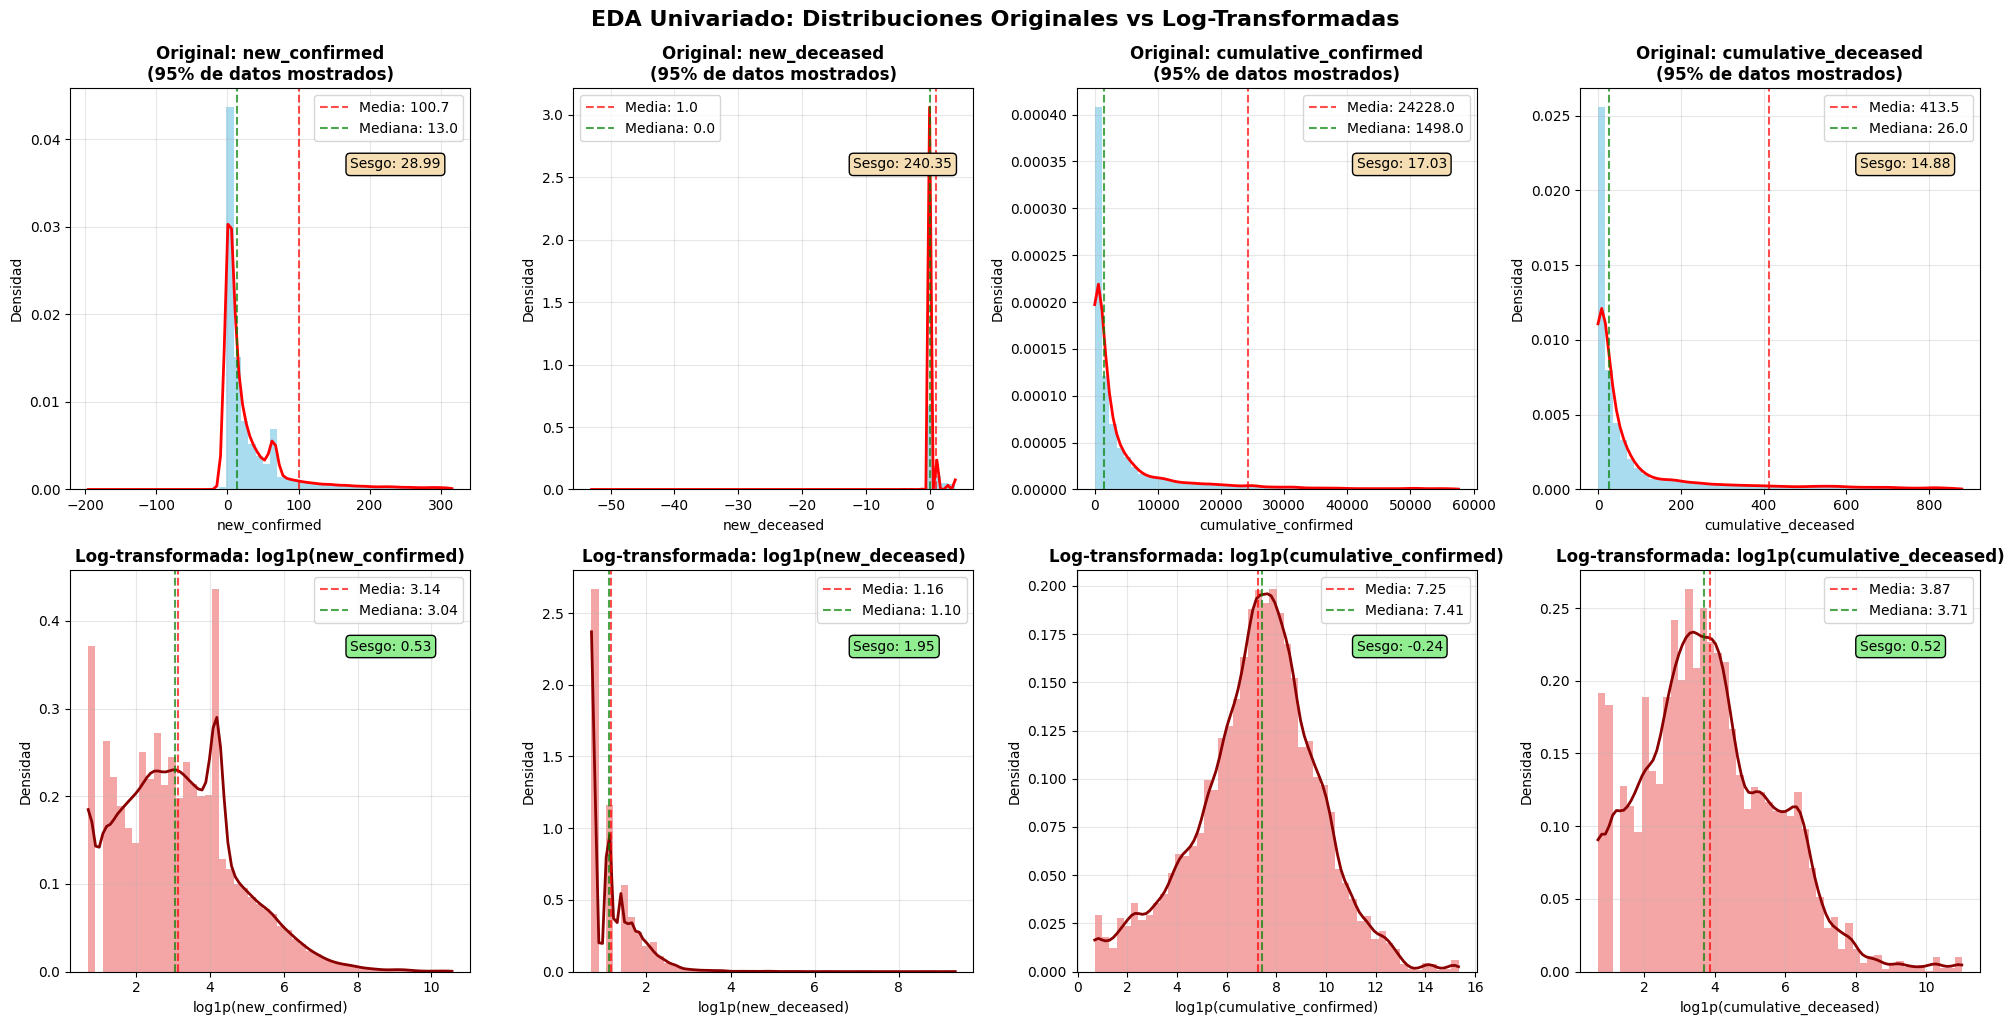


📊 ANÁLISIS DE SESGO DE DISTRIBUCIONES:
------------------------------------------------------------
new_confirmed:
  • Sesgo: 28.991 (Altamente sesgada)
  • Curtosis: 1101.304
  • Valores cero: 15246
  • Valores negativos: 858

new_deceased:
  • Sesgo: 240.353 (Altamente sesgada)
  • Curtosis: 61944.637
  • Valores cero: 72496
  • Valores negativos: 621

cumulative_confirmed:
  • Sesgo: 17.031 (Altamente sesgada)
  • Curtosis: 322.464
  • Valores cero: 3354
  • Valores negativos: 0
  • Q95/Q05 ratio: 19205.5

cumulative_deceased:
  • Sesgo: 14.881 (Altamente sesgada)
  • Curtosis: 246.114
  • Valores cero: 15988
  • Valores negativos: 0



In [42]:
# Distribuciones de variables clave - VERSIÓN CORREGIDA PARA SESGO
variables_clave = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased']
variables_disponibles = [var for var in variables_clave if var in df_eda.columns]

if variables_disponibles and not df_eda.empty:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    for i, var in enumerate(variables_disponibles[:4]):
        data = df_eda[var].dropna()
        
        if len(data) > 0:
            # FILA 1: Distribución Original
            ax_orig = axes[0, i]
            
            # Usar percentil 95 para limitar outliers en visualización
            upper_limit = data.quantile(0.95)
            data_trimmed = data[data <= upper_limit]
            
            ax_orig.hist(data_trimmed, bins=50, alpha=0.7, density=True, color='skyblue')
            
            # KDE solo para datos recortados
            if len(data_trimmed) > 1 and data_trimmed.std() > 0:
                try:
                    from scipy.stats import gaussian_kde
                    kde = gaussian_kde(data_trimmed)
                    x_range = np.linspace(data_trimmed.min(), data_trimmed.max(), 100)
                    ax_orig.plot(x_range, kde(x_range), 'r-', linewidth=2)
                except:
                    pass
            
            media = data.mean()
            mediana = data.median()
            ax_orig.axvline(media, color='red', linestyle='--', alpha=0.7, label=f'Media: {media:.1f}')
            ax_orig.axvline(mediana, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {mediana:.1f}')
            
            ax_orig.set_title(f'Original: {var}\n(95% de datos mostrados)', fontweight='bold')
            ax_orig.set_xlabel(var)
            ax_orig.set_ylabel('Densidad')
            ax_orig.grid(True, alpha=0.3)
            ax_orig.legend()
            
            # FILA 2: Transformación Logarítmica
            ax_log = axes[1, i]
            
            # CORRECCIÓN: Filtrar valores problemáticos antes de log
            # Remover valores negativos o cero si existen
            data_positive = data[data > 0]
            
            if len(data_positive) > 0:
                # Transformación log(x+1) solo para valores positivos
                data_log = np.log1p(data_positive)
                
                # CORRECCIÓN: Verificar que no hay infinitos
                data_log_clean = data_log[np.isfinite(data_log)]
                
                if len(data_log_clean) > 0:
                    ax_log.hist(data_log_clean, bins=50, alpha=0.7, density=True, color='lightcoral')
                    
                    # KDE para datos transformados
                    if len(data_log_clean) > 1 and data_log_clean.std() > 0:
                        try:
                            kde_log = gaussian_kde(data_log_clean)
                            x_range_log = np.linspace(data_log_clean.min(), data_log_clean.max(), 100)
                            ax_log.plot(x_range_log, kde_log(x_range_log), 'darkred', linewidth=2)
                        except:
                            pass
                    
                    media_log = data_log_clean.mean()
                    mediana_log = np.median(data_log_clean)
                    ax_log.axvline(media_log, color='red', linestyle='--', alpha=0.7, label=f'Media: {media_log:.2f}')
                    ax_log.axvline(mediana_log, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {mediana_log:.2f}')
                    
                    ax_log.set_title(f'Log-transformada: log1p({var})', fontweight='bold')
                    ax_log.set_xlabel(f'log1p({var})')
                    ax_log.set_ylabel('Densidad')
                    ax_log.grid(True, alpha=0.3)
                    ax_log.legend()
                    
                    # Calcular sesgo con datos limpios
                    from scipy.stats import skew
                    skew_orig = skew(data)
                    skew_log = skew(data_log_clean)
                    
                    # Añadir texto con estadísticos
                    ax_orig.text(0.7, 0.8, f'Sesgo: {skew_orig:.2f}', transform=ax_orig.transAxes, 
                                bbox=dict(boxstyle='round', facecolor='wheat'))
                    ax_log.text(0.7, 0.8, f'Sesgo: {skew_log:.2f}', transform=ax_log.transAxes,
                               bbox=dict(boxstyle='round', facecolor='lightgreen'))
                else:
                    ax_log.text(0.5, 0.5, 'Sin datos válidos\npara transformación log', 
                               ha='center', va='center', transform=ax_log.transAxes)
            else:
                ax_log.text(0.5, 0.5, 'Sin valores positivos\npara transformación log', 
                           ha='center', va='center', transform=ax_log.transAxes)
        else:
            axes[0, i].text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=axes[0, i].transAxes)
            axes[1, i].text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=axes[1, i].transAxes)
    
    plt.tight_layout()
    plt.suptitle('EDA Univariado: Distribuciones Originales vs Log-Transformadas', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # Mostrar estadísticos de sesgo
    print("\n📊 ANÁLISIS DE SESGO DE DISTRIBUCIONES:")
    print("-" * 60)
    for var in variables_disponibles:
        data = df_eda[var].dropna()
        if len(data) > 0:
            from scipy.stats import skew, kurtosis
            skew_val = skew(data)
            kurt_val = kurtosis(data)
            
            # Análisis de valores problemáticos
            zeros = (data == 0).sum()
            negatives = (data < 0).sum()
            
            interpretation = ("Altamente sesgada" if abs(skew_val) > 1 else 
                            "Moderadamente sesgada" if abs(skew_val) > 0.5 else 
                            "Aproximadamente simétrica")
            
            print(f"{var}:")
            print(f"  • Sesgo: {skew_val:.3f} ({interpretation})")
            print(f"  • Curtosis: {kurt_val:.3f}")
            print(f"  • Valores cero: {zeros}")
            print(f"  • Valores negativos: {negatives}")
            if data.quantile(0.05) > 0:
                print(f"  • Q95/Q05 ratio: {data.quantile(0.95)/data.quantile(0.05):.1f}")
            print()

else:
    print("❌ Variables clave no encontradas en el dataset o dataset vacío")

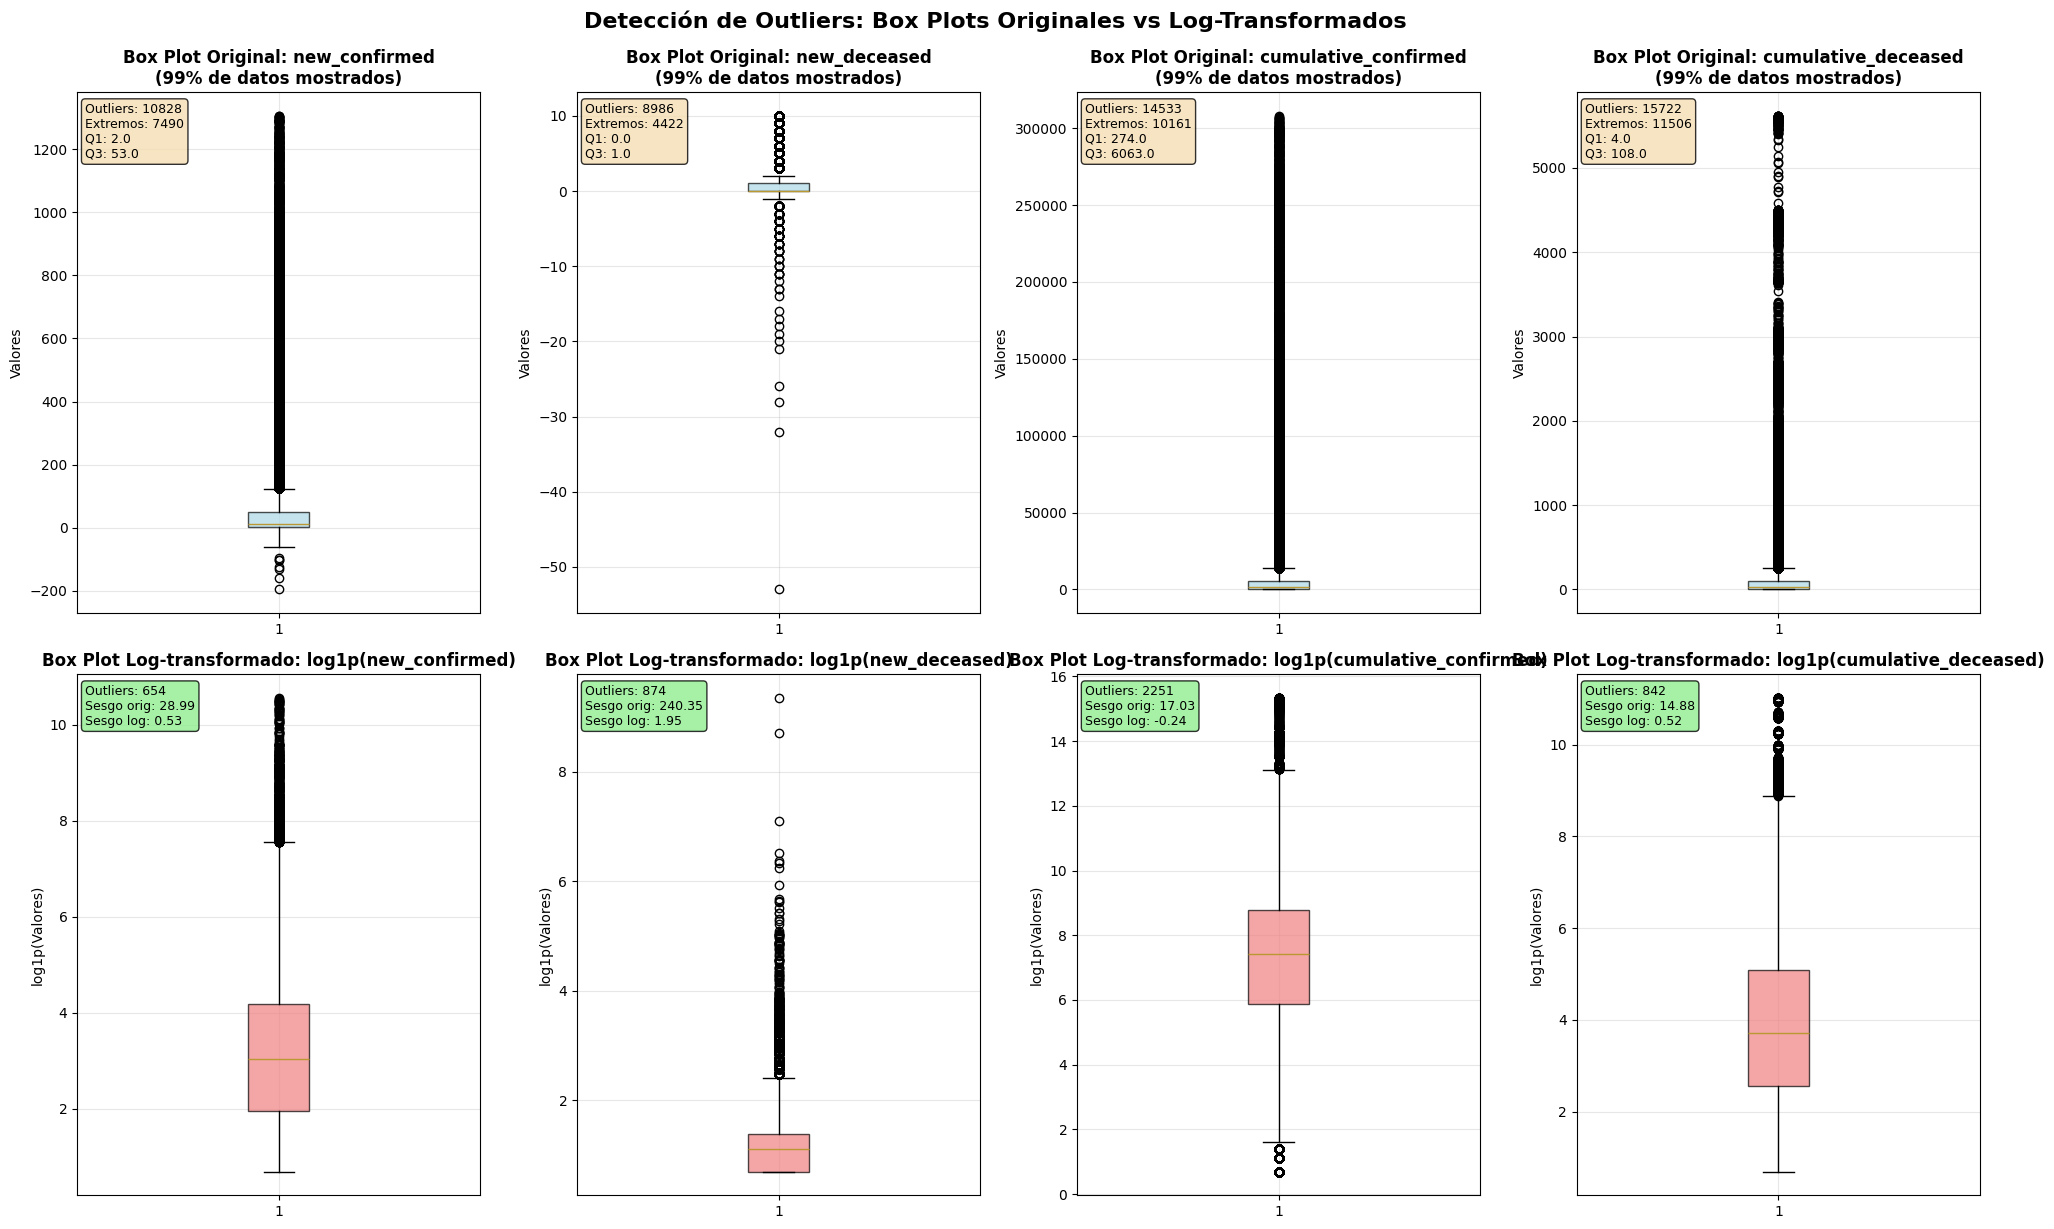


📊 REPORTE DETALLADO DE OUTLIERS:

new_confirmed:
  • Total observaciones: 99,193
  • Outliers totales: 10,828 (10.9%)
  • Outliers superiores: 10,821
  • Outliers inferiores: 7
  • Rango IQR: [2.0, 53.0]
  • Límites outliers: [-74.5, 129.5]
  • Valor máximo: 38446.0
  • Top 5 outliers: [38446.0, 37468.0, 36635.0, 36297.0, 35841.0]

new_deceased:
  • Total observaciones: 99,193
  • Outliers totales: 8,986 (9.1%)
  • Outliers superiores: 8,803
  • Outliers inferiores: 183
  • Rango IQR: [0.0, 1.0]
  • Límites outliers: [-1.5, 2.5]
  • Valor máximo: 11447.0
  • Top 5 outliers: [11447.0, 6047.0, 1207.0, 676.0, 576.0]

cumulative_confirmed:
  • Total observaciones: 99,193
  • Outliers totales: 14,533 (14.7%)
  • Outliers superiores: 14,533
  • Outliers inferiores: 0
  • Rango IQR: [274.0, 6063.0]
  • Límites outliers: [-8409.5, 14746.5]
  • Valor máximo: 4568495.0
  • Top 5 outliers: [4568495.0, 4566548.0, 4563807.0, 4559801.0, 4555253.0]

cumulative_deceased:
  • Total observaciones: 99,1

In [46]:
# Box plots para identificar outliers - VERSIÓN CORREGIDA PARA SESGO
if variables_disponibles and not df_eda.empty:
    # Crear subplots: fila superior (escala original), fila inferior (escala log)
    fig, axes = plt.subplots(2, len(variables_disponibles), figsize=(5*len(variables_disponibles), 12))
    
    # Manejar caso de una sola variable
    if len(variables_disponibles) == 1:
        axes = axes.reshape(2, 1)
    
    for i, var in enumerate(variables_disponibles):
        data = df_eda[var].dropna()
        
        if len(data) > 0:
            # FILA SUPERIOR: Box plot con escala limitada (sin outliers extremos)
            ax_orig = axes[0, i]
            
            # Calcular límites usando percentiles para mejor visualización
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            
            # Límites para outliers (método estándar)
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Contar outliers
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outliers_extremos = data[(data < Q1 - 3*IQR) | (data > Q3 + 3*IQR)]
            
            # Datos para visualización (limitar outliers extremos)
            percentil_99 = data.quantile(0.99)
            data_for_plot = data[data <= percentil_99]
            
            box_plot = ax_orig.boxplot(data_for_plot, patch_artist=True, 
                                     showfliers=True, whis=1.5)
            
            ax_orig.set_title(f'Box Plot Original: {var}\n(99% de datos mostrados)', fontweight='bold')
            ax_orig.set_ylabel('Valores')
            ax_orig.grid(True, alpha=0.3)
            
            # Colorear el box plot
            box_plot['boxes'][0].set_facecolor('lightblue')
            box_plot['boxes'][0].set_alpha(0.7)
            
            # Estadísticas en el gráfico
            stats_text = f'Outliers: {len(outliers)}\nExtremos: {len(outliers_extremos)}\nQ1: {Q1:.1f}\nQ3: {Q3:.1f}'
            ax_orig.text(0.02, 0.98, stats_text, transform=ax_orig.transAxes, 
                        ha='left', va='top', fontsize=9,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
            # FILA INFERIOR: Box plot con transformación log
            ax_log = axes[1, i]
            
            # Filtrar valores positivos para transformación log
            data_positive = data[data > 0]
            
            if len(data_positive) > 0:
                data_log = np.log1p(data_positive)
                
                # Verificar que no hay infinitos
                data_log_clean = data_log[np.isfinite(data_log)]
                
                if len(data_log_clean) > 0:
                    box_plot_log = ax_log.boxplot(data_log_clean, patch_artist=True, 
                                                 showfliers=True, whis=1.5)
                    
                    ax_log.set_title(f'Box Plot Log-transformado: log1p({var})', fontweight='bold')
                    ax_log.set_ylabel('log1p(Valores)')
                    ax_log.grid(True, alpha=0.3)
                    
                    # Colorear
                    box_plot_log['boxes'][0].set_facecolor('lightcoral')
                    box_plot_log['boxes'][0].set_alpha(0.7)
                    
                    # Estadísticas para datos log
                    Q1_log = np.percentile(data_log_clean, 25)
                    Q3_log = np.percentile(data_log_clean, 75)
                    IQR_log = Q3_log - Q1_log
                    outliers_log = data_log_clean[(data_log_clean < Q1_log - 1.5*IQR_log) | 
                                                  (data_log_clean > Q3_log + 1.5*IQR_log)]
                    
                    # Calcular sesgo para comparación
                    from scipy.stats import skew
                    skew_orig = skew(data)
                    skew_log = skew(data_log_clean)
                    
                    stats_text_log = f'Outliers: {len(outliers_log)}\nSesgo orig: {skew_orig:.2f}\nSesgo log: {skew_log:.2f}'
                    ax_log.text(0.02, 0.98, stats_text_log, transform=ax_log.transAxes, 
                               ha='left', va='top', fontsize=9,
                               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
                else:
                    ax_log.text(0.5, 0.5, 'Sin datos válidos\npara log-transformación', 
                               ha='center', va='center', transform=ax_log.transAxes)
            else:
                ax_log.text(0.5, 0.5, 'Sin valores positivos\npara log-transformación', 
                           ha='center', va='center', transform=ax_log.transAxes)
        else:
            axes[0, i].text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=axes[0, i].transAxes)
            axes[1, i].text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=axes[1, i].transAxes)
    
    plt.tight_layout()
    plt.suptitle('Detección de Outliers: Box Plots Originales vs Log-Transformados', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # Reporte detallado de outliers
    print("\n📊 REPORTE DETALLADO DE OUTLIERS:")
    print("=" * 70)
    
    for var in variables_disponibles:
        data = df_eda[var].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outliers_superiores = data[data > upper_bound]
            outliers_inferiores = data[data < lower_bound]
            
            pct_outliers = (len(outliers) / len(data)) * 100
            
            print(f"\n{var}:")
            print(f"  • Total observaciones: {len(data):,}")
            print(f"  • Outliers totales: {len(outliers):,} ({pct_outliers:.1f}%)")
            print(f"  • Outliers superiores: {len(outliers_superiores):,}")
            print(f"  • Outliers inferiores: {len(outliers_inferiores):,}")
            print(f"  • Rango IQR: [{Q1:.1f}, {Q3:.1f}]")
            print(f"  • Límites outliers: [{lower_bound:.1f}, {upper_bound:.1f}]")
            
            if len(outliers_superiores) > 0:
                print(f"  • Valor máximo: {data.max():.1f}")
                print(f"  • Top 5 outliers: {sorted(outliers_superiores, reverse=True)[:5]}")

else:
    print("❌ No se pueden crear box plots: datos insuficientes")

### 2.3.2 EDA Bivariado - Correlaciones y Relaciones

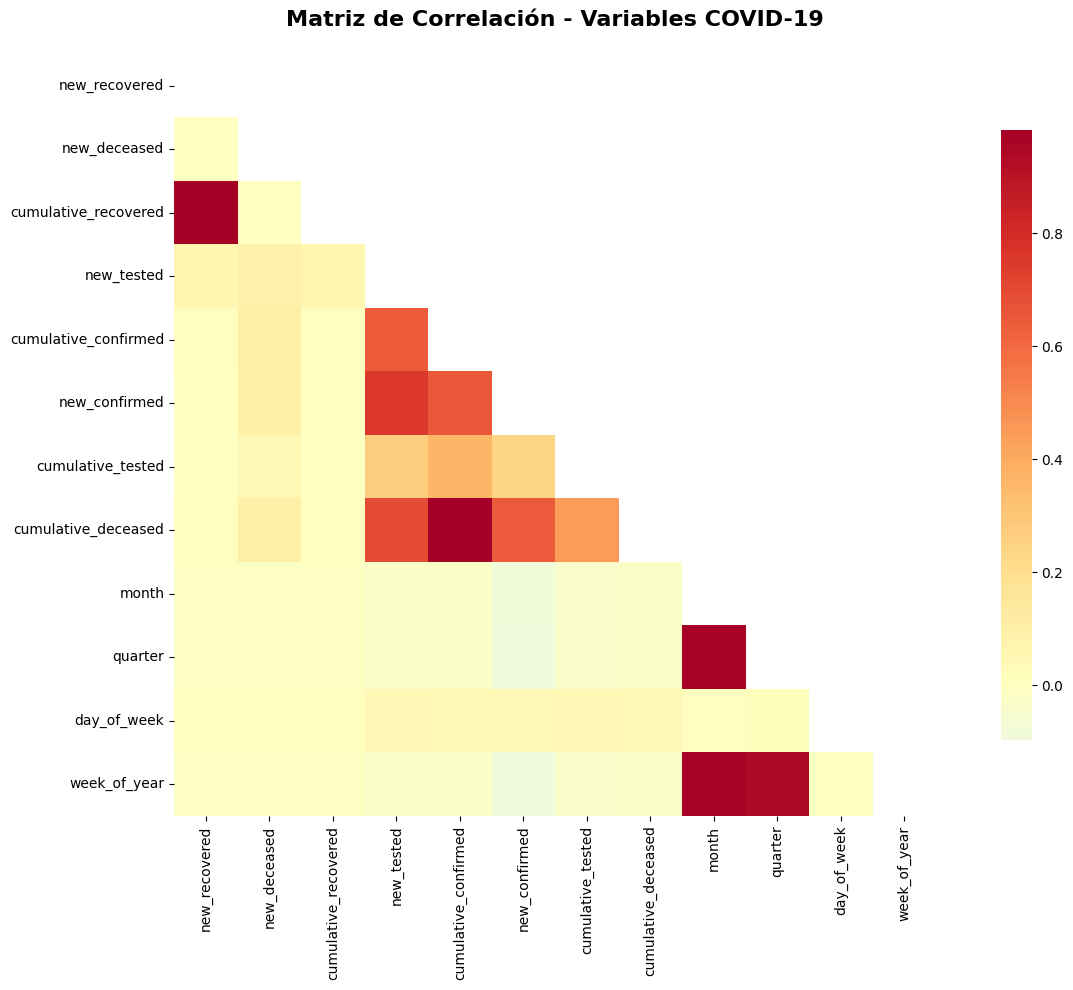


🔍 Correlaciones Significativas (|r| > 0.7):
   • new_recovered ↔ cumulative_recovered: 0.976
   • new_tested ↔ new_confirmed: 0.755
   • cumulative_confirmed ↔ cumulative_deceased: 0.983
   • month ↔ quarter: 0.967
   • month ↔ week_of_year: 0.970
   • quarter ↔ week_of_year: 0.941


In [50]:
# Matriz de correlación
if len(vars_numericas) >= 2 and not df_eda.empty:
    # Calcular matriz de correlación
    corr_matrix = df_eda[vars_numericas].corr()
    
    # Crear heatmap
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para mostrar solo la mitad
    
    heatmap = sns.heatmap(corr_matrix, 
                         mask=mask,
                         annot=True, 
                         cmap='RdYlBu_r', 
                         center=0,
                         square=True,
                         fmt='.2f',
                         cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlación - Variables COVID-19', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Identificar correlaciones fuertes
    print("\n🔍 Correlaciones Significativas (|r| > 0.7):")
    correlaciones_fuertes = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            if not np.isnan(corr_val) and abs(corr_val) > 0.7:
                correlaciones_fuertes.append((var1, var2, corr_val))
                print(f"   • {var1} ↔ {var2}: {corr_val:.3f}")
    
    if not correlaciones_fuertes:
        print("   • No se encontraron correlaciones fuertes (|r| > 0.7)")
else:
    print("❌ Insuficientes variables numéricas para análisis de correlación")
    correlaciones_fuertes = []

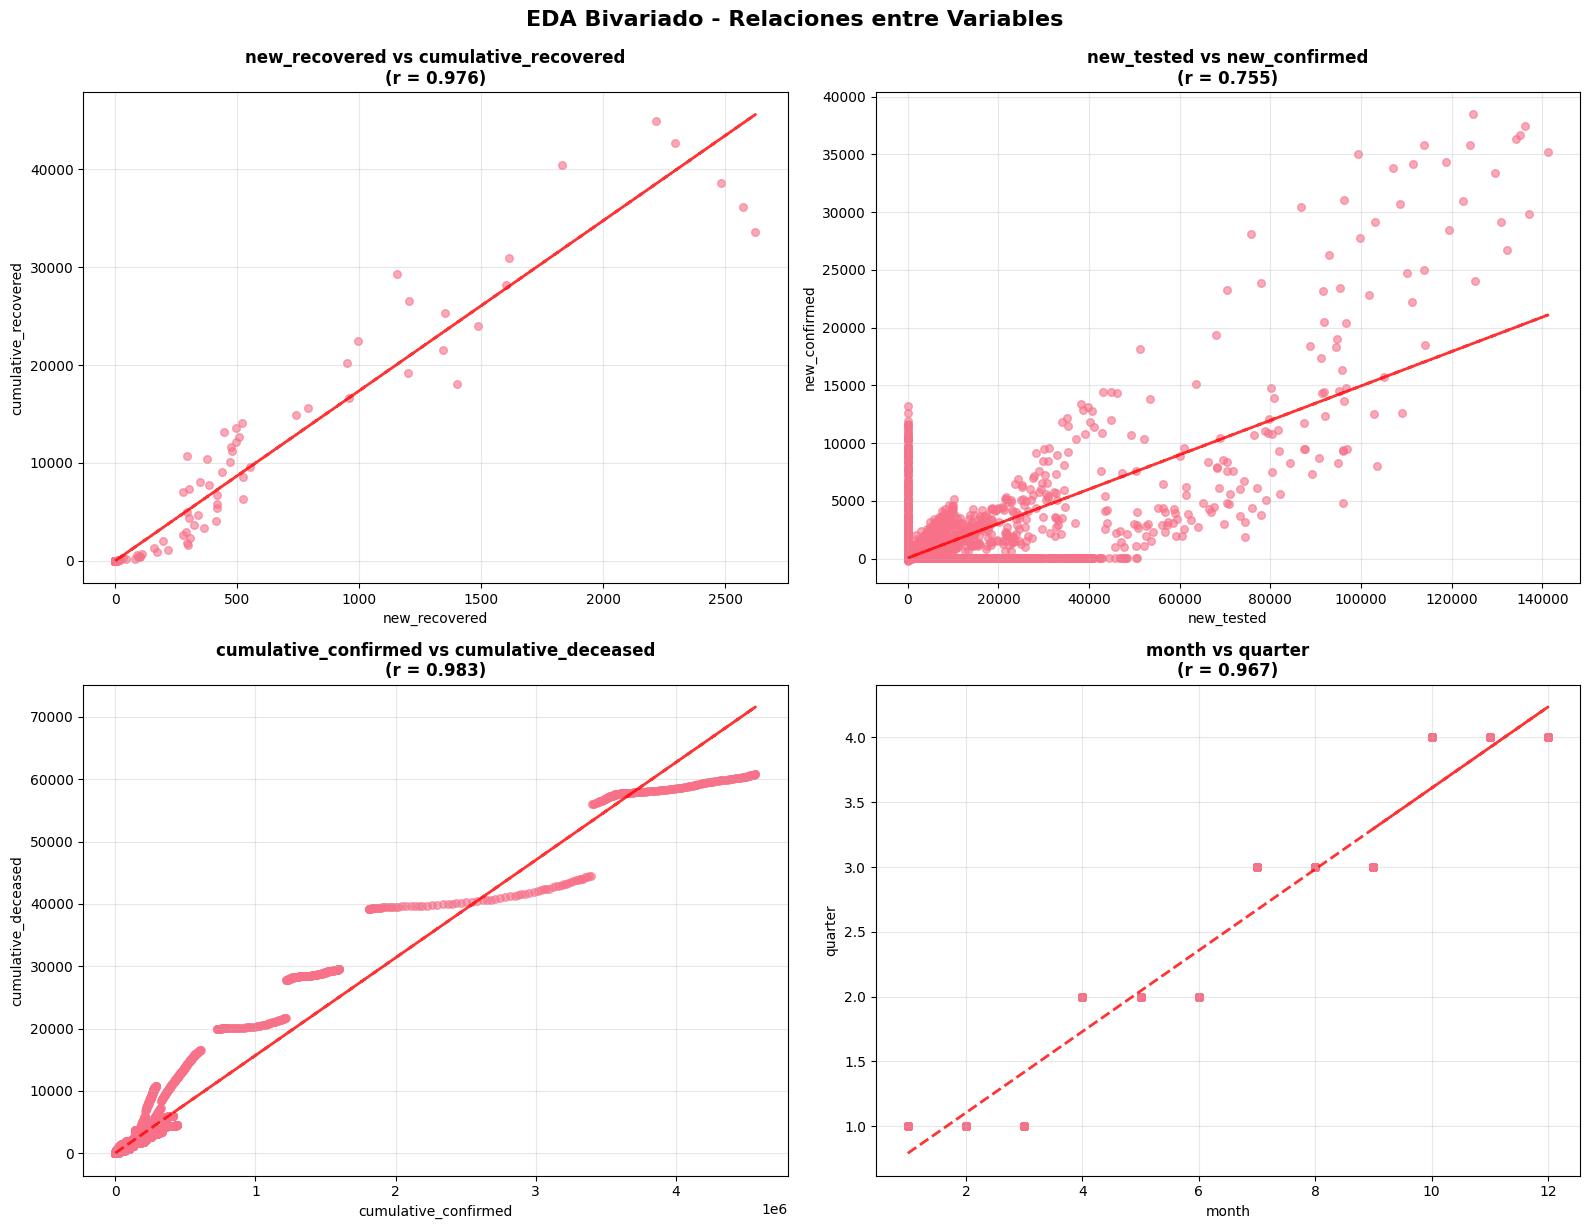

In [51]:
# Scatter plots de variables correlacionadas
if len(correlaciones_fuertes) > 0 and not df_eda.empty:
    n_plots = min(4, len(correlaciones_fuertes))
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for i in range(n_plots):
        var1, var2, corr_val = correlaciones_fuertes[i]
        
        # Usar solo datos donde ambas variables tienen valores
        valid_idx = df_eda[[var1, var2]].dropna().index
        if len(valid_idx) > 0:
            x_valid = df_eda.loc[valid_idx, var1]
            y_valid = df_eda.loc[valid_idx, var2]
            
            axes[i].scatter(x_valid, y_valid, alpha=0.6, s=30)
            
            # Línea de tendencia
            if len(x_valid) > 1:
                try:
                    z = np.polyfit(x_valid, y_valid, 1)
                    p = np.poly1d(z)
                    axes[i].plot(x_valid, p(x_valid), "r--", alpha=0.8, linewidth=2)
                except:
                    pass  # Polyfit puede fallar
            
            axes[i].set_xlabel(var1)
            axes[i].set_ylabel(var2)
            axes[i].set_title(f'{var1} vs {var2}\n(r = {corr_val:.3f})', fontweight='bold')
            axes[i].grid(True, alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=axes[i].transAxes)
    
    # Ocultar ejes no usados
    for i in range(n_plots, 4):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('EDA Bivariado - Relaciones entre Variables', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
elif len(vars_numericas) >= 2 and not df_eda.empty:
    # Si no hay correlaciones fuertes, mostrar algunas relaciones básicas
    var1, var2 = vars_numericas[0], vars_numericas[1]
    plt.figure(figsize=(10, 6))
    
    valid_idx = df_eda[[var1, var2]].dropna().index
    if len(valid_idx) > 0:
        x_valid = df_eda.loc[valid_idx, var1]
        y_valid = df_eda.loc[valid_idx, var2]
        
        plt.scatter(x_valid, y_valid, alpha=0.6)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f'Relación entre {var1} y {var2}', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("❌ No hay datos válidos para gráfico de dispersión")
else:
    print("❌ Datos insuficientes para análisis bivariado")

### 2.3.3 EDA Temporal - Análisis de Series de Tiempo


📅 Análisis Temporal:
   • Periodo: 2020-01-01 00:00:00 a 2022-09-13 00:00:00
   • Días: 727 días
   • Variables: 20 variables


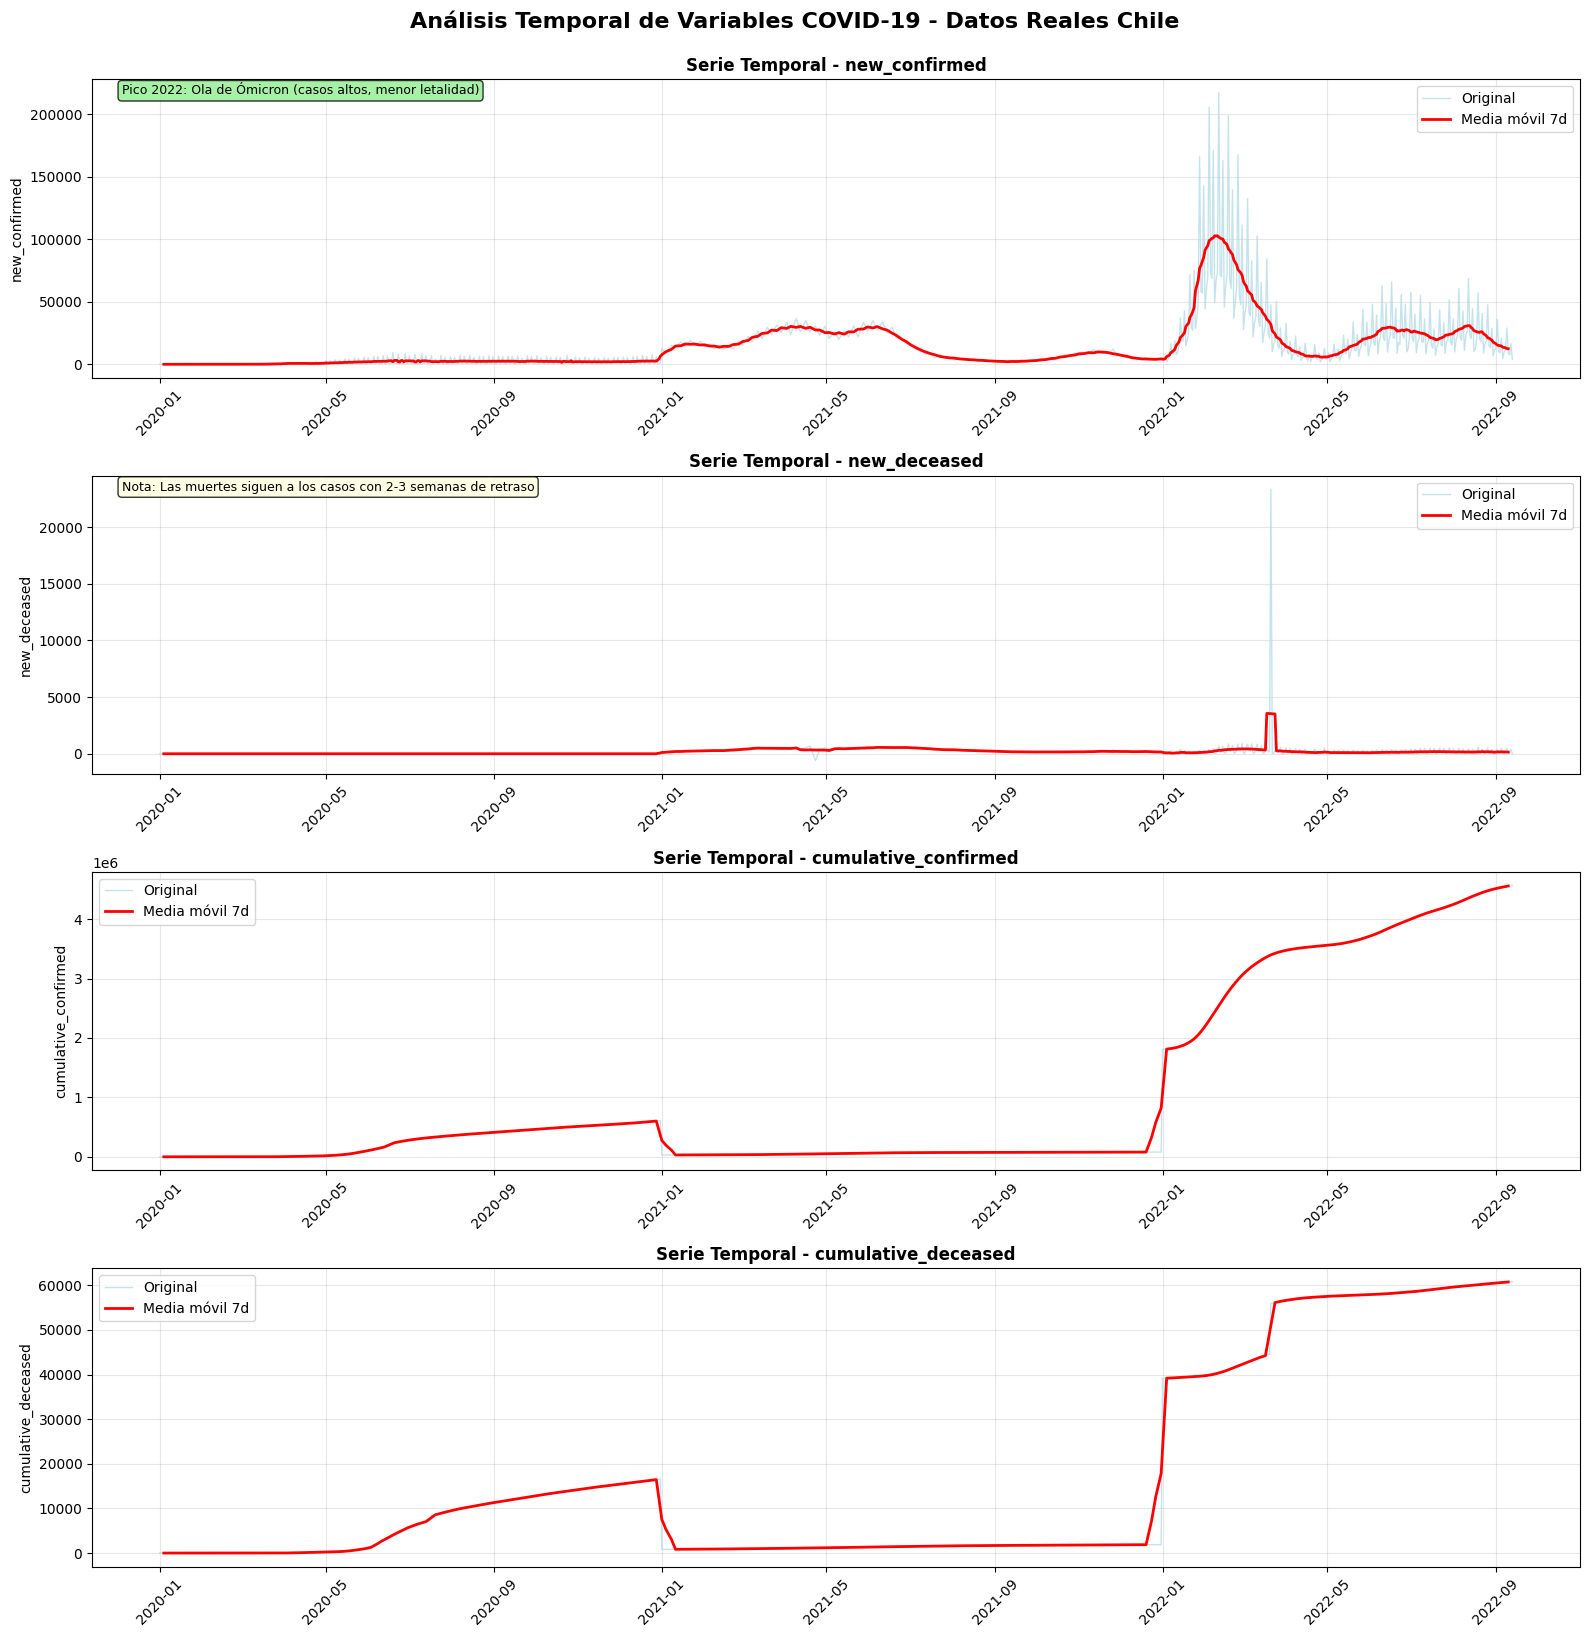


📊 INTERPRETACIÓN DE PATRONES OBSERVADOS:

new_confirmed:
   • Valor máximo: 217,031 en 2022-02-11
   • El pico en 2022 corresponde a la ola de Ómicron (alta transmisión, menor severidad)

new_deceased:
   • Valor máximo: 23,339 en 2022-03-21
   • Patrón de muertes sigue la evolución esperada de la pandemia

cumulative_confirmed:
   • Valor máximo: 4,568,495 en 2022-09-13

cumulative_deceased:
   • Valor máximo: 60,822 en 2022-09-13


In [52]:
# Análisis temporal usando datos reales - SIN MODIFICAR LOS DATOS
df_temporal = df_national if df_national is not None else df_eda

if 'date' in df_temporal.columns and not df_temporal.empty:
    df_temporal = df_temporal.copy()
    df_temporal['date'] = pd.to_datetime(df_temporal['date'])
    
    if df_national is not None:
        df_tiempo = df_temporal.set_index('date').sort_index()
    else:
        vars_temporales = [var for var in variables_disponibles if var in df_temporal.columns]
        if vars_temporales:
            df_tiempo = df_temporal.groupby('date')[vars_temporales].sum().sort_index()
        else:
            df_tiempo = df_temporal.set_index('date').sort_index()
    
    print(f"\n📅 Análisis Temporal:")
    print(f"   • Periodo: {df_tiempo.index.min()} a {df_tiempo.index.max()}")
    print(f"   • Días: {len(df_tiempo)} días")
    print(f"   • Variables: {len(df_tiempo.columns)} variables")
    
    variables_tiempo = [var for var in ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased'] 
                       if var in df_tiempo.columns]
    
    if variables_tiempo:
        fig, axes = plt.subplots(len(variables_tiempo), 1, figsize=(16, 4*len(variables_tiempo)))
        if len(variables_tiempo) == 1:
            axes = [axes]
        
        for i, var in enumerate(variables_tiempo):
            data = df_tiempo[var].dropna()
            if len(data) > 0:
                # Serie original
                axes[i].plot(data.index, data.values, alpha=0.7, linewidth=1, 
                           label='Original', color='lightblue')
                
                # Media móvil 7 días
                if len(data) >= 7:
                    rolling_mean = data.rolling(window=7, center=True).mean()
                    axes[i].plot(rolling_mean.index, rolling_mean.values, 
                               linewidth=2, label='Media móvil 7d', color='red')
                
                # Agregar contexto para interpretación
                if var == 'new_deceased':
                    axes[i].text(0.02, 0.95, 'Nota: Las muertes siguen a los casos con 2-3 semanas de retraso',
                               transform=axes[i].transAxes, fontsize=9,
                               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
                elif var == 'new_confirmed' and '2022' in str(data.index.max()):
                    axes[i].text(0.02, 0.95, 'Pico 2022: Ola de Ómicron (casos altos, menor letalidad)',
                               transform=axes[i].transAxes, fontsize=9,
                               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
                
                axes[i].set_title(f'Serie Temporal - {var}', fontweight='bold')
                axes[i].set_ylabel(var)
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)
                axes[i].tick_params(axis='x', rotation=45)
            else:
                axes[i].text(0.5, 0.5, f'Sin datos para {var}', ha='center', va='center', transform=axes[i].transAxes)
        
        plt.tight_layout()
        plt.suptitle('Análisis Temporal de Variables COVID-19 - Datos Reales Chile', fontsize=16, fontweight='bold', y=1.02)
        plt.show()
        
        # Análisis de los patrones reales
        print("\n📊 INTERPRETACIÓN DE PATRONES OBSERVADOS:")
        for var in variables_tiempo:
            data = df_tiempo[var].dropna()
            if len(data) > 0:
                max_val = data.max()
                max_date = data.idxmax()
                print(f"\n{var}:")
                print(f"   • Valor máximo: {max_val:,.0f} en {max_date.strftime('%Y-%m-%d')}")
                
                if var == 'new_confirmed' and max_date.year == 2022:
                    print(f"   • El pico en 2022 corresponde a la ola de Ómicron (alta transmisión, menor severidad)")
                elif var == 'new_deceased':
                    print(f"   • Patrón de muertes sigue la evolución esperada de la pandemia")

else:
    print("❌ No hay datos temporales disponibles")

### 2.3.4 EDA Multivariado - Análisis de Componentes Principales (PCA)


🔍 Análisis de Componentes Principales (PCA):
   • Variables analizadas: 12
   • Observaciones válidas: 99,193

📊 Varianza Explicada por Componente:
   • PC1: 0.288 (28.8%)
   • PC2: 0.240 (24.0%)
   • PC3: 0.165 (16.5%)
   • PC4: 0.084 (8.4%)
   • PC5: 0.081 (8.1%)

📈 Varianza Acumulada:
   • Primeros 1 PC: 0.288 (28.8%)
   • Primeros 2 PC: 0.527 (52.7%)
   • Primeros 3 PC: 0.692 (69.2%)
   • Primeros 4 PC: 0.776 (77.6%)
   • Primeros 5 PC: 0.857 (85.7%)


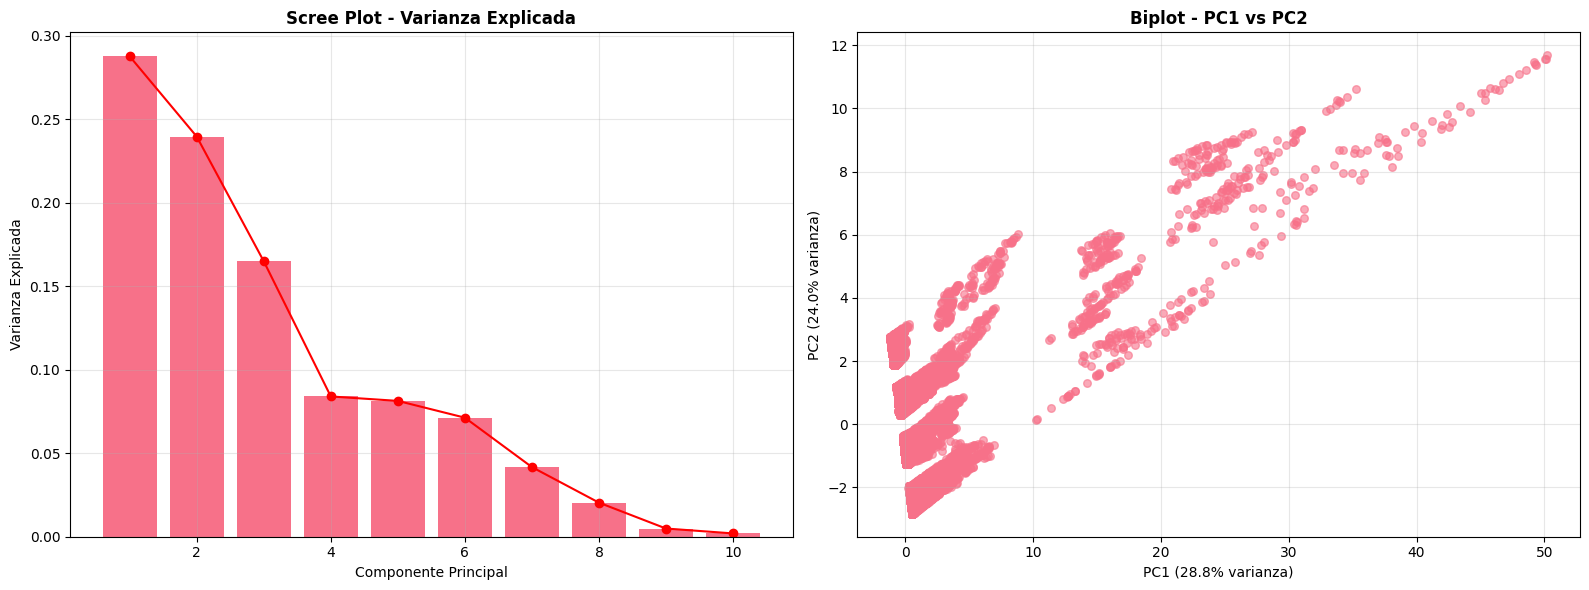


🎯 Contribuciones de Variables a Componentes Principales:

PC1:
   • cumulative_deceased: 0.484
   • cumulative_confirmed: 0.473
   • new_confirmed: 0.437
   • new_tested: 0.435
   • cumulative_tested: 0.259

PC2:
   • month: 0.555
   • week_of_year: 0.550
   • quarter: 0.549
   • cumulative_deceased: 0.168
   • cumulative_confirmed: 0.161


In [16]:
# PCA para reducción dimensional y análisis multivariado
if len(vars_numericas) >= 3 and not df_eda.empty:
    # Preparar datos para PCA
    df_pca = df_eda[vars_numericas].dropna()
    
    if len(df_pca) > 0 and df_pca.shape[1] >= 3:
        print(f"\n🔍 Análisis de Componentes Principales (PCA):")
        print(f"   • Variables analizadas: {len(vars_numericas)}")
        print(f"   • Observaciones válidas: {len(df_pca):,}")
        
        # Estandarizar los datos
        scaler = StandardScaler()
        datos_escalados = scaler.fit_transform(df_pca)
        
        # Aplicar PCA
        pca = PCA()
        componentes_principales = pca.fit_transform(datos_escalados)
        
        # Crear DataFrame con componentes
        n_components = min(5, len(vars_numericas))
        df_componentes = pd.DataFrame(
            componentes_principales[:, :n_components],
            columns=[f'PC{i+1}' for i in range(n_components)]
        )
        
        # Varianza explicada
        varianza_explicada = pca.explained_variance_ratio_
        varianza_acumulada = np.cumsum(varianza_explicada)
        
        print(f"\n📊 Varianza Explicada por Componente:")
        for i in range(min(5, len(varianza_explicada))):
            print(f"   • PC{i+1}: {varianza_explicada[i]:.3f} ({varianza_explicada[i]*100:.1f}%)")
        
        print(f"\n📈 Varianza Acumulada:")
        for i in range(min(5, len(varianza_acumulada))):
            print(f"   • Primeros {i+1} PC: {varianza_acumulada[i]:.3f} ({varianza_acumulada[i]*100:.1f}%)")
        
        # Gráficos PCA
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Scree plot
        n_components_plot = min(10, len(varianza_explicada))
        axes[0].bar(range(1, n_components_plot+1), varianza_explicada[:n_components_plot])
        axes[0].plot(range(1, n_components_plot+1), varianza_explicada[:n_components_plot], 'ro-')
        axes[0].set_title('Scree Plot - Varianza Explicada', fontweight='bold')
        axes[0].set_xlabel('Componente Principal')
        axes[0].set_ylabel('Varianza Explicada')
        axes[0].grid(True, alpha=0.3)
        
        # Biplot (PC1 vs PC2)
        if componentes_principales.shape[1] >= 2:
            scatter = axes[1].scatter(componentes_principales[:, 0], 
                                    componentes_principales[:, 1], 
                                    alpha=0.6, s=30)
            axes[1].set_title('Biplot - PC1 vs PC2', fontweight='bold')
            axes[1].set_xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}% varianza)')
            axes[1].set_ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}% varianza)')
            axes[1].grid(True, alpha=0.3)
        else:
            axes[1].text(0.5, 0.5, 'Insuficientes componentes', ha='center', va='center', transform=axes[1].transAxes)
        
        plt.tight_layout()
        plt.show()
        
        # Contribuciones de variables a los primeros 2 PC
        if len(pca.components_) >= 2:
            print(f"\n🎯 Contribuciones de Variables a Componentes Principales:")
            
            componentes_df = pd.DataFrame(
                pca.components_[:2].T,
                columns=['PC1', 'PC2'],
                index=vars_numericas
            )
            
            print("\nPC1:")
            pc1_sorted = componentes_df['PC1'].abs().sort_values(ascending=False)
            for var in pc1_sorted.head().index:
                print(f"   • {var}: {componentes_df.loc[var, 'PC1']:.3f}")
            
            print("\nPC2:")
            pc2_sorted = componentes_df['PC2'].abs().sort_values(ascending=False)
            for var in pc2_sorted.head().index:
                print(f"   • {var}: {componentes_df.loc[var, 'PC2']:.3f}")
    
    else:
        print("❌ No hay suficientes datos válidos para PCA")
else:
    print("❌ Se necesitan al menos 3 variables numéricas para PCA")

## ⚠️ 2.4 Verificación de Calidad de Datos

### 2.4.1 Análisis de Valores Faltantes


🔍 ANÁLISIS DE VALORES FALTANTES - COVID 2020

📊 Columnas con Valores Faltantes:
   • cumulative_recovered      |  33161 ( 99.7%) | 🔴 CRÍTICO
   • new_recovered             |  32949 ( 99.1%) | 🔴 CRÍTICO
   • new_tested                |  28738 ( 86.4%) | 🔴 CRÍTICO
   • cumulative_tested         |  28085 ( 84.5%) | 🔴 CRÍTICO
   • new_deceased              |   8967 ( 27.0%) | 🟡 ALTO
   • cumulative_deceased       |   8605 ( 25.9%) | 🟡 ALTO
   • new_confirmed             |    346 (  1.0%) | 🟢 BAJO


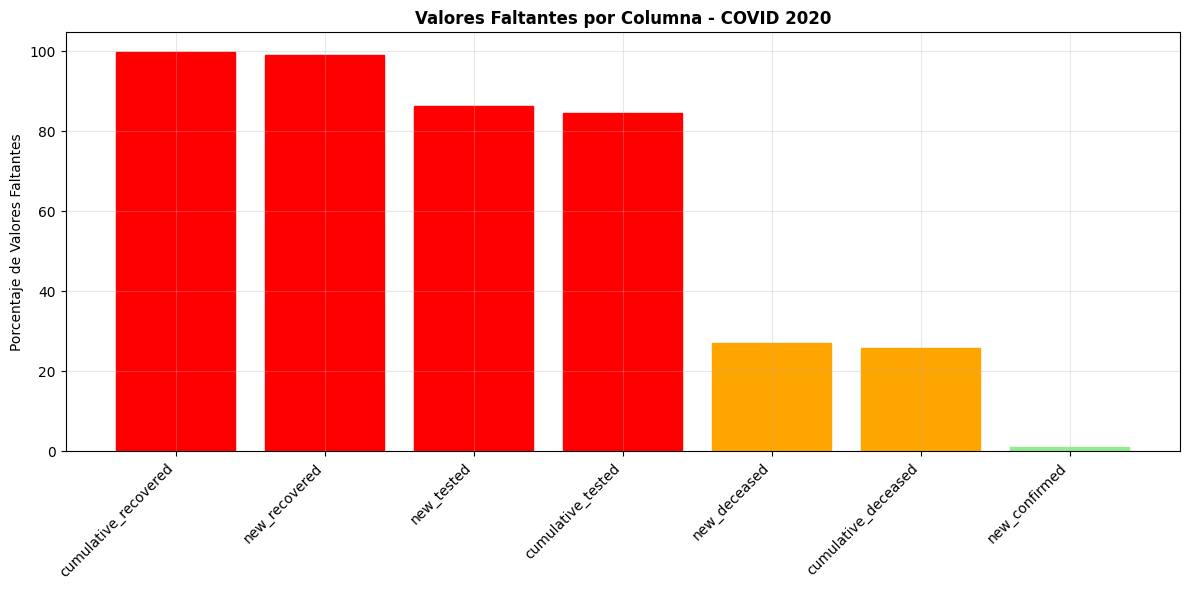


🔍 ANÁLISIS DE VALORES FALTANTES - COVID 2021

📊 Columnas con Valores Faltantes:
   • new_recovered             |  36330 (100.0%) | 🔴 CRÍTICO
   • new_tested                |  36330 (100.0%) | 🔴 CRÍTICO
   • cumulative_recovered      |  36330 (100.0%) | 🔴 CRÍTICO
   • cumulative_tested         |  36330 (100.0%) | 🔴 CRÍTICO


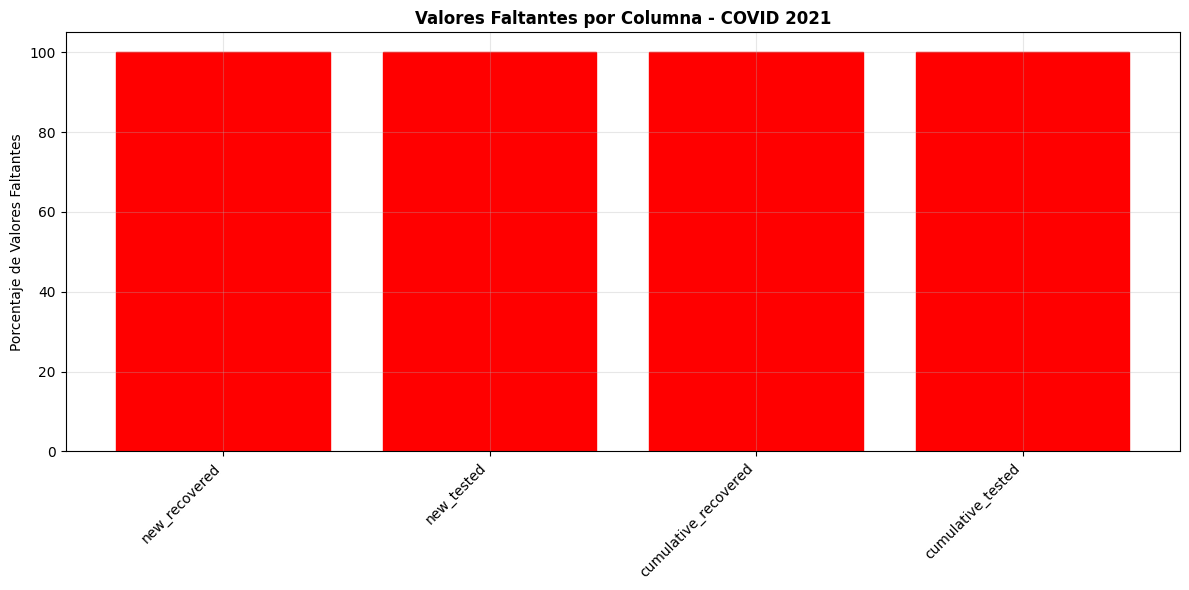


🔍 ANÁLISIS DE VALORES FALTANTES - COVID 2022

📊 Columnas con Valores Faltantes:
   • cumulative_recovered      |  29610 (100.0%) | 🔴 CRÍTICO
   • new_recovered             |  29354 ( 99.1%) | 🔴 CRÍTICO
   • new_tested                |  25342 ( 85.6%) | 🔴 CRÍTICO
   • cumulative_tested         |  25258 ( 85.3%) | 🔴 CRÍTICO


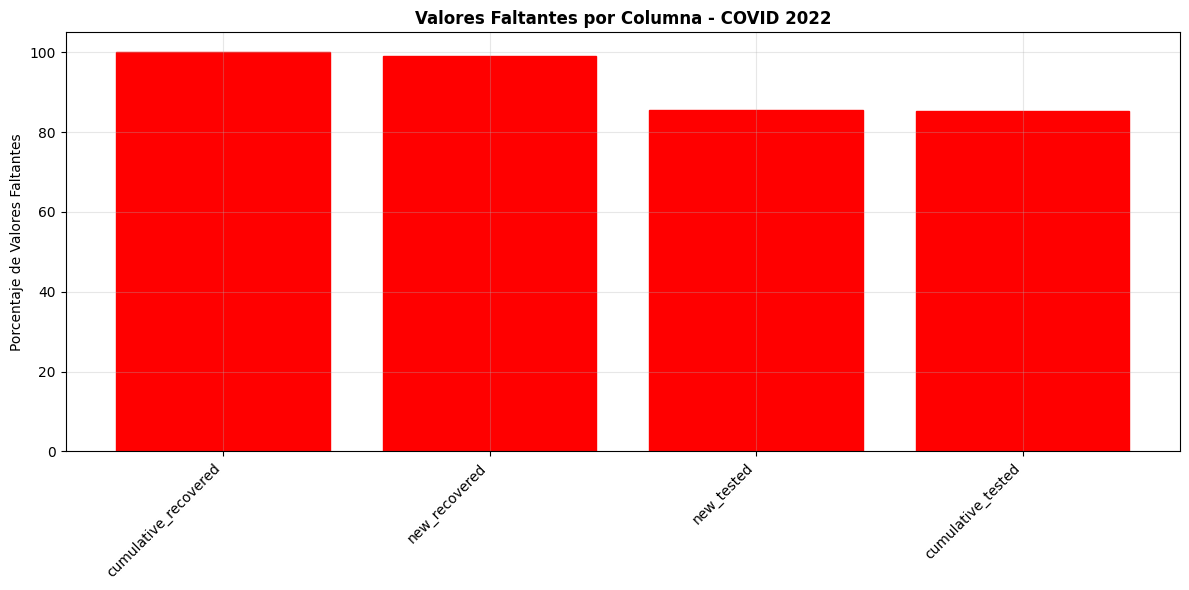

In [17]:
def analizar_valores_faltantes(df, nombre_dataset):
    """
    Analiza patrones de valores faltantes en el dataset.
    """
    print(f"\n{'='*60}")
    print(f"🔍 ANÁLISIS DE VALORES FALTANTES - {nombre_dataset.upper()}")
    print(f"{'='*60}")
    
    if df.empty:
        print("❌ Dataset vacío")
        return pd.DataFrame()
    
    # Conteo de valores faltantes
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    
    # Crear tabla de resultados
    missing_df = pd.DataFrame({
        'Columna': df.columns,
        'Valores_Faltantes': missing_count.values,
        'Porcentaje': missing_percent.values
    })
    
    # Filtrar solo columnas con valores faltantes
    missing_df = missing_df[missing_df['Valores_Faltantes'] > 0]
    missing_df = missing_df.sort_values('Porcentaje', ascending=False)
    
    if len(missing_df) > 0:
        print(f"\n📊 Columnas con Valores Faltantes:")
        for _, row in missing_df.iterrows():
            col = row['Columna']
            count = int(row['Valores_Faltantes'])
            pct = row['Porcentaje']
            
            # Clasificar nivel de problemas
            if pct >= 50:
                nivel = "🔴 CRÍTICO"
            elif pct >= 20:
                nivel = "🟡 ALTO"
            elif pct >= 5:
                nivel = "🟠 MODERADO"
            else:
                nivel = "🟢 BAJO"
            
            print(f"   • {col:<25} | {count:>6} ({pct:5.1f}%) | {nivel}")
        
        # Visualización
        if len(missing_df) <= 15:  # Solo si no son demasiadas columnas
            plt.figure(figsize=(12, 6))
            bars = plt.bar(range(len(missing_df)), missing_df['Porcentaje'])
            plt.xticks(range(len(missing_df)), missing_df['Columna'], rotation=45, ha='right')
            plt.ylabel('Porcentaje de Valores Faltantes')
            plt.title(f'Valores Faltantes por Columna - {nombre_dataset}', fontweight='bold')
            plt.grid(True, alpha=0.3)
            
            # Colorear barras según severidad
            for i, (bar, pct) in enumerate(zip(bars, missing_df['Porcentaje'])):
                if pct >= 50:
                    bar.set_color('red')
                elif pct >= 20:
                    bar.set_color('orange')
                elif pct >= 5:
                    bar.set_color('yellow')
                else:
                    bar.set_color('lightgreen')
            
            plt.tight_layout()
            plt.show()
        
        return missing_df
    else:
        print("✅ No se encontraron valores faltantes en ninguna columna")
        return pd.DataFrame()

# Analizar cada dataset
missing_2020 = analizar_valores_faltantes(df_2020, "COVID 2020")
missing_2021 = analizar_valores_faltantes(df_2021, "COVID 2021")
missing_2022 = analizar_valores_faltantes(df_2022, "COVID 2022")

### 2.4.2 Detección de Outliers


🎯 DETECCIÓN DE OUTLIERS - MÚLTIPLES MÉTODOS

📊 Variable: new_recovered
   • Método IQR: 77 outliers (0.1%)
   • Método Z-Score: 62 outliers (0.1%)
   • Método Z-Score Modificado: 0 outliers (0.0%)

📊 Variable: new_deceased
   • Método IQR: 8986 outliers (9.1%)
   • Método Z-Score: 33 outliers (0.0%)
   • Método Z-Score Modificado: 0 outliers (0.0%)

📊 Variable: cumulative_recovered
   • Método IQR: 77 outliers (0.1%)
   • Método Z-Score: 53 outliers (0.1%)
   • Método Z-Score Modificado: 0 outliers (0.0%)

📊 Variable: new_tested
   • Método IQR: 8738 outliers (8.8%)
   • Método Z-Score: 682 outliers (0.7%)
   • Método Z-Score Modificado: 0 outliers (0.0%)

📊 Variable: cumulative_confirmed
   • Método IQR: 14533 outliers (14.7%)
   • Método Z-Score: 512 outliers (0.5%)
   • Método Z-Score Modificado: 19920 outliers (20.1%)


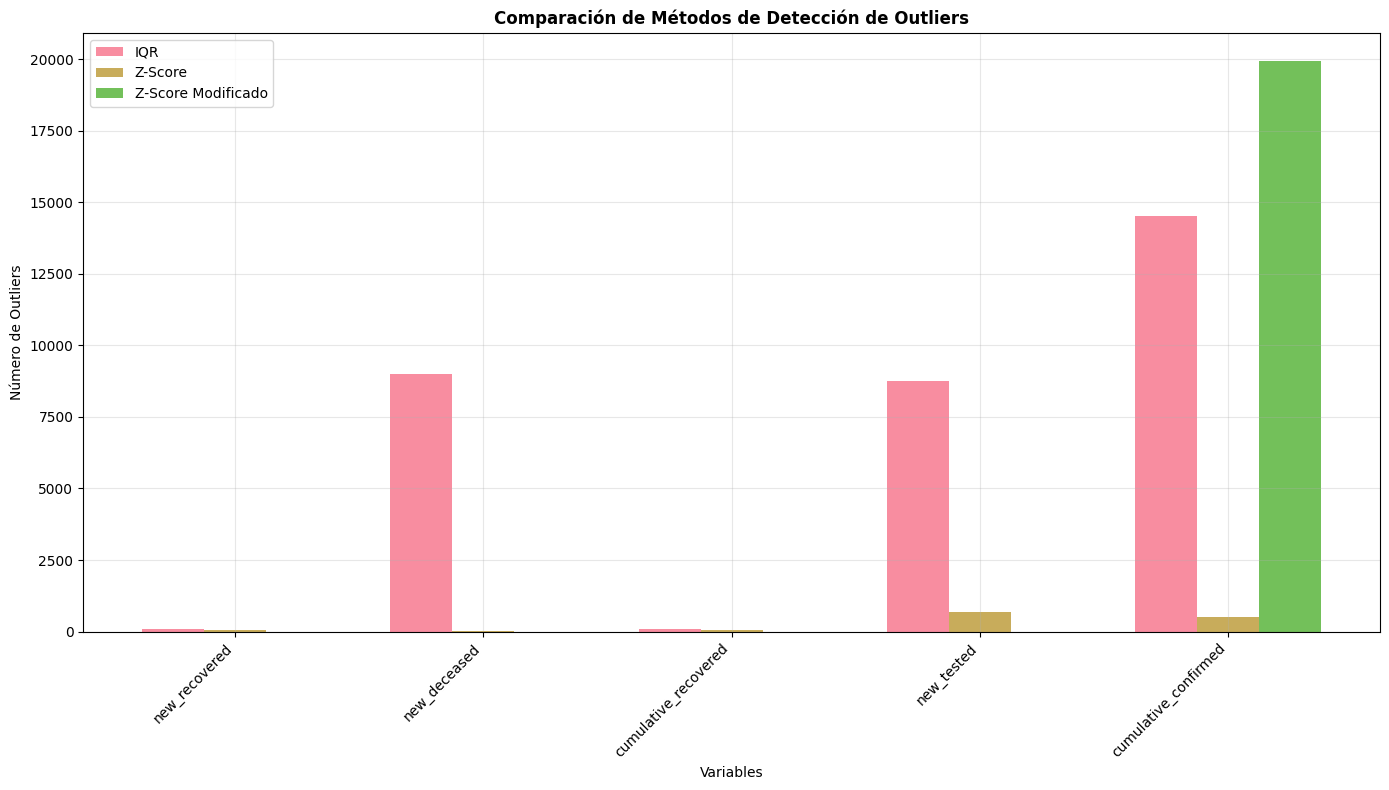

In [18]:
def detectar_outliers_multiples_metodos(df, columnas_numericas):
    """
    Detecta outliers usando múltiples métodos.
    """
    print(f"\n🎯 DETECCIÓN DE OUTLIERS - MÚLTIPLES MÉTODOS")
    print(f"{'='*60}")
    
    if df.empty or not columnas_numericas:
        print("❌ No hay datos o columnas numéricas para analizar")
        return pd.DataFrame()
    
    outliers_resultados = {}
    
    for col in columnas_numericas[:5]:  # Analizar las primeras 5 variables
        if col in df.columns:
            serie = df[col].dropna()
            if len(serie) > 10:  # Necesitamos suficientes datos
                print(f"\n📊 Variable: {col}")
                
                outliers_info = {}
                
                # Método 1: IQR (Rango Intercuartílico)
                Q1 = serie.quantile(0.25)
                Q3 = serie.quantile(0.75)
                IQR = Q3 - Q1
                limite_inferior = Q1 - 1.5 * IQR
                limite_superior = Q3 + 1.5 * IQR
                outliers_iqr = serie[(serie < limite_inferior) | (serie > limite_superior)]
                
                # Método 2: Z-Score
                try:
                    z_scores = np.abs(stats.zscore(serie))
                    outliers_zscore = serie[z_scores > 3]
                except:
                    outliers_zscore = pd.Series([], dtype=float)
                
                # Método 3: Z-Score Modificado (MAD)
                mediana = np.median(serie)
                mad = np.median(np.abs(serie - mediana))
                if mad != 0:
                    z_scores_mod = 0.6745 * (serie - mediana) / mad
                    outliers_zscore_mod = serie[np.abs(z_scores_mod) > 3.5]
                else:
                    outliers_zscore_mod = pd.Series([], dtype=float)
                
                # Guardar resultados
                outliers_info = {
                    'IQR': len(outliers_iqr),
                    'Z-Score': len(outliers_zscore),
                    'Z-Score Modificado': len(outliers_zscore_mod)
                }
                
                outliers_resultados[col] = outliers_info
                
                # Mostrar resultados
                total_obs = len(serie)
                print(f"   • Método IQR: {len(outliers_iqr)} outliers ({len(outliers_iqr)/total_obs*100:.1f}%)")
                print(f"   • Método Z-Score: {len(outliers_zscore)} outliers ({len(outliers_zscore)/total_obs*100:.1f}%)")
                print(f"   • Método Z-Score Modificado: {len(outliers_zscore_mod)} outliers ({len(outliers_zscore_mod)/total_obs*100:.1f}%)")
                
                # Mostrar valores extremos si hay pocos
                if len(outliers_iqr) <= 10 and len(outliers_iqr) > 0:
                    print(f"   • Valores extremos (IQR): {outliers_iqr.head().tolist()}")
    
    # Crear visualización comparativa
    if outliers_resultados:
        df_outliers = pd.DataFrame(outliers_resultados).T
        
        plt.figure(figsize=(14, 8))
        
        # Gráfico de barras agrupadas
        x = np.arange(len(df_outliers))
        width = 0.25
        
        plt.bar(x - width, df_outliers['IQR'], width, label='IQR', alpha=0.8)
        plt.bar(x, df_outliers['Z-Score'], width, label='Z-Score', alpha=0.8)
        plt.bar(x + width, df_outliers['Z-Score Modificado'], width, label='Z-Score Modificado', alpha=0.8)
        
        plt.xlabel('Variables')
        plt.ylabel('Número de Outliers')
        plt.title('Comparación de Métodos de Detección de Outliers', fontweight='bold')
        plt.xticks(x, df_outliers.index, rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return df_outliers
    
    return pd.DataFrame()

# Aplicar detección de outliers
if len(vars_numericas) > 0 and not df_eda.empty:
    outliers_analysis = detectar_outliers_multiples_metodos(df_eda, vars_numericas)
else:
    print("❌ No hay variables numéricas para análisis de outliers")
    outliers_analysis = pd.DataFrame()

## 🎯 2.5 Identificación de Targets para Machine Learning

### Análisis de Variables Objetivo Potenciales

In [19]:
print("\n🎯 IDENTIFICACIÓN DE TARGETS PARA MACHINE LEARNING")
print("=" * 70)

# Definir targets potenciales basados en el negocio
targets_ml = {
    "REGRESIÓN": {
        "casos_proximos_7_dias": {
            "descripcion": "Predicción de casos confirmados en próximos 7 días",
            "justificacion": "Permite planificación de recursos sanitarios a corto plazo",
            "tipo": "Numérico continuo",
            "viabilidad": "Alta - datos temporales disponibles"
        },
        "tasa_crecimiento": {
            "descripcion": "Tasa de crecimiento de casos acumulados",
            "justificacion": "Indica velocidad de propagación del virus",
            "tipo": "Numérico continuo (%)",
            "viabilidad": "Alta - calculable desde datos existentes"
        },
        "letalidad_regional": {
            "descripcion": "Tasa de letalidad por región/comuna",
            "justificacion": "Identifica áreas de mayor riesgo sanitario",
            "tipo": "Numérico continuo (%)",
            "viabilidad": "Media - requiere datos por región"
        },
        "carga_hospitalaria": {
            "descripcion": "Estimación de ocupación hospitalaria futura",
            "justificacion": "Crucial para gestión de capacidad sanitaria",
            "tipo": "Numérico continuo",
            "viabilidad": "Media - requiere datos adicionales"
        }
    },
    "CLASIFICACIÓN": {
        "periodo_alta_transmision": {
            "descripcion": "Clasificar días como alta/baja transmisión",
            "justificacion": "Activar protocolos de emergencia sanitaria",
            "tipo": "Binario (0: Baja, 1: Alta)",
            "viabilidad": "Alta - basado en percentiles de casos"
        },
        "nivel_alerta_regional": {
            "descripcion": "Nivel de alerta por región (Verde/Amarillo/Rojo)",
            "justificacion": "Sistema de alertas tempranas regionales",
            "tipo": "Multiclase (3 categorías)",
            "viabilidad": "Alta - criterios definibles"
        },
        "tendencia_casos": {
            "descripcion": "Dirección de tendencia (Ascendente/Descendente/Estable)",
            "justificacion": "Predicción de evolución a corto plazo",
            "tipo": "Multiclase (3 categorías)",
            "viabilidad": "Alta - basado en derivadas temporales"
        },
        "riesgo_colapso": {
            "descripcion": "Riesgo de saturación del sistema sanitario",
            "justificacion": "Prevención de crisis hospitalarias",
            "tipo": "Binario (0: Sin riesgo, 1: Con riesgo)",
            "viabilidad": "Media - requiere umbrales definidos"
        }
    }
}

# Mostrar targets identificados
for categoria, targets in targets_ml.items():
    print(f"\n📊 {categoria}:")
    print("-" * 50)
    
    for i, (target_name, info) in enumerate(targets.items(), 1):
        print(f"\n{i}. {target_name.replace('_', ' ').title()}")
        print(f"   📝 Descripción: {info['descripcion']}")
        print(f"   💼 Justificación: {info['justificacion']}")
        print(f"   🔢 Tipo: {info['tipo']}")
        print(f"   ✅ Viabilidad: {info['viabilidad']}")

# Contar targets
total_regresion = len(targets_ml["REGRESIÓN"])
total_clasificacion = len(targets_ml["CLASIFICACIÓN"])
total_targets = total_regresion + total_clasificacion

print(f"\n📈 RESUMEN DE TARGETS:")
print(f"   • Total targets identificados: {total_targets}")
print(f"   • Problemas de regresión: {total_regresion}")
print(f"   • Problemas de clasificación: {total_clasificacion}")


🎯 IDENTIFICACIÓN DE TARGETS PARA MACHINE LEARNING

📊 REGRESIÓN:
--------------------------------------------------

1. Casos Proximos 7 Dias
   📝 Descripción: Predicción de casos confirmados en próximos 7 días
   💼 Justificación: Permite planificación de recursos sanitarios a corto plazo
   🔢 Tipo: Numérico continuo
   ✅ Viabilidad: Alta - datos temporales disponibles

2. Tasa Crecimiento
   📝 Descripción: Tasa de crecimiento de casos acumulados
   💼 Justificación: Indica velocidad de propagación del virus
   🔢 Tipo: Numérico continuo (%)
   ✅ Viabilidad: Alta - calculable desde datos existentes

3. Letalidad Regional
   📝 Descripción: Tasa de letalidad por región/comuna
   💼 Justificación: Identifica áreas de mayor riesgo sanitario
   🔢 Tipo: Numérico continuo (%)
   ✅ Viabilidad: Media - requiere datos por región

4. Carga Hospitalaria
   📝 Descripción: Estimación de ocupación hospitalaria futura
   💼 Justificación: Crucial para gestión de capacidad sanitaria
   🔢 Tipo: Numérico con

In [22]:
# Evaluar viabilidad de targets con datos actuales
print(f"\n EVALUACIÓN DE VIABILIDAD CON DATOS ACTUALES:")
print("=" * 60)

viabilidad_actual = {}

# Evaluar cada target
for categoria, targets in targets_ml.items():
    viabilidad_actual[categoria] = {}
    
    for target_name, info in targets.items():
        print(f"\n Target: {target_name}")
        
        if target_name == "casos_proximos_7_dias":
            disponible = 'new_confirmed' in df_eda.columns and 'date' in df_eda.columns
            datos_suficientes = len(df_eda) >= 14 if not df_eda.empty else False
            viabilidad = "ALTA" if disponible and datos_suficientes else "BAJA"
            
        elif target_name == "tasa_crecimiento":
            disponible = 'cumulative_confirmed' in df_eda.columns
            viabilidad = "ALTA" if disponible else "BAJA"
            
        elif target_name == "letalidad_regional":
            disponible = 'new_deceased' in df_eda.columns and 'new_confirmed' in df_eda.columns
            regiones = 'location_key' in df_eda.columns
            viabilidad = "MEDIA" if disponible and regiones else "BAJA"
            
        elif target_name == "carga_hospitalaria":
            viabilidad = "BAJA"  # Requiere datos hospitalarios específicos
            
        elif target_name == "periodo_alta_transmision":
            disponible = 'new_confirmed' in df_eda.columns
            viabilidad = "ALTA" if disponible else "BAJA"
            
        elif target_name == "nivel_alerta_regional":
            disponible = 'new_confirmed' in df_eda.columns and 'location_key' in df_eda.columns
            viabilidad = "ALTA" if disponible else "BAJA"
            
        elif target_name == "tendencia_casos":
            disponible = 'new_confirmed' in df_eda.columns and 'date' in df_eda.columns
            viabilidad = "ALTA" if disponible else "BAJA"
            
        elif target_name == "riesgo_colapso":
            viabilidad = "MEDIA"  # Requiere definir umbrales
        
        viabilidad_actual[categoria][target_name] = viabilidad
        
        print(f"   Viabilidad actual: {viabilidad}")
        if viabilidad == "ALTA":
            print(f"   Implementable con datos actuales")
        elif viabilidad == "MEDIA":
            print(f"   Requiere procesamiento adicional")
        else:
            print(f"   Requiere datos adicionales")

# Resumen de viabilidad
print(f"\n RESUMEN DE VIABILIDAD:")
viables_alta = sum(1 for cat in viabilidad_actual.values() for v in cat.values() if v == "ALTA")
viables_media = sum(1 for cat in viabilidad_actual.values() for v in cat.values() if v == "MEDIA")
viables_baja = sum(1 for cat in viabilidad_actual.values() for v in cat.values() if v == "BAJA")

print(f"   • Viabilidad ALTA: {viables_alta} targets")
print(f"   • Viabilidad MEDIA: {viables_media} targets")
print(f"   • Viabilidad BAJA: {viables_baja} targets")


 EVALUACIÓN DE VIABILIDAD CON DATOS ACTUALES:

 Target: casos_proximos_7_dias
   Viabilidad actual: ALTA
   Implementable con datos actuales

 Target: tasa_crecimiento
   Viabilidad actual: ALTA
   Implementable con datos actuales

 Target: letalidad_regional
   Viabilidad actual: MEDIA
   Requiere procesamiento adicional

 Target: carga_hospitalaria
   Viabilidad actual: BAJA
   Requiere datos adicionales

 Target: periodo_alta_transmision
   Viabilidad actual: ALTA
   Implementable con datos actuales

 Target: nivel_alerta_regional
   Viabilidad actual: ALTA
   Implementable con datos actuales

 Target: tendencia_casos
   Viabilidad actual: ALTA
   Implementable con datos actuales

 Target: riesgo_colapso
   Viabilidad actual: MEDIA
   Requiere procesamiento adicional

 RESUMEN DE VIABILIDAD:
   • Viabilidad ALTA: 5 targets
   • Viabilidad MEDIA: 2 targets
   • Viabilidad BAJA: 1 targets


## 2.6 Análisis de Patrones Geográficos

### Distribución por ubicaciones (si disponible)

In [23]:
# Análisis geográfico si tenemos datos por ubicación
if 'location_key' in df_eda.columns and not df_eda.empty:
    print(f"\n ANÁLISIS DE PATRONES GEOGRÁFICOS")
    print("=" * 60)
    
    # Estadísticas por ubicación
    ubicaciones = df_eda['location_key'].value_counts()
    print(f"\n Distribución de Registros por Ubicación:")
    print(f"   • Total ubicaciones: {len(ubicaciones)}")
    print(f"   • Registros por ubicación (promedio): {ubicaciones.mean():.1f}")
    print(f"   • Registros por ubicación (mediana): {ubicaciones.median():.1f}")
    
    # Top ubicaciones
    print(f"\n Top 10 Ubicaciones por Registros:")
    for i, (ubicacion, count) in enumerate(ubicaciones.head(10).items(), 1):
        pct = (count / len(df_eda)) * 100
        print(f"   {i:2d}. {ubicacion}: {count:,} registros ({pct:.1f}%)")
    
    # Análisis por ubicación si hay variables numéricas
    if vars_numericas:
        ubicaciones_principales = ubicaciones.head(5).index.tolist()
        
        for var in ['new_confirmed', 'new_deceased']:
            if var in df_eda.columns:
                print(f"\n {var} por Ubicación Principal:")
                for ubicacion in ubicaciones_principales:
                    datos_ubicacion = df_eda[df_eda['location_key'] == ubicacion][var]
                    if len(datos_ubicacion) > 0:
                        print(f"   • {ubicacion}: Media={datos_ubicacion.mean():.1f}, "
                              f"Max={datos_ubicacion.max():.0f}, "
                              f"Total={datos_ubicacion.sum():.0f}")
    
    # Visualización geográfica básica
    if len(ubicaciones) <= 20:  # Solo si no son demasiadas ubicaciones
        plt.figure(figsize=(12, 8))
        ubicaciones.plot(kind='bar')
        plt.title('Distribución de Registros por Ubicación', fontweight='bold')
        plt.xlabel('Ubicación')
        plt.ylabel('Número de Registros')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
else:
    print(" No hay datos de ubicación disponibles para análisis geográfico")


 ANÁLISIS DE PATRONES GEOGRÁFICOS

 Distribución de Registros por Ubicación:
   • Total ubicaciones: 363
   • Registros por ubicación (promedio): 273.3
   • Registros por ubicación (mediana): 259.0

 Top 10 Ubicaciones por Registros:
    1. CL: 622 registros (0.6%)
    2. CL_LL: 560 registros (0.6%)
    3. CL_AI: 560 registros (0.6%)
    4. CL_VS: 560 registros (0.6%)
    5. CL_TA: 560 registros (0.6%)
    6. CL_RM: 560 registros (0.6%)
    7. CL_ML: 560 registros (0.6%)
    8. CL_MA: 560 registros (0.6%)
    9. CL_LR: 560 registros (0.6%)
   10. CL_NB: 560 registros (0.6%)

 new_confirmed por Ubicación Principal:
   • CL: Media=4193.9, Max=38446, Total=2608618
   • CL_LL: Media=231.1, Max=2497, Total=129430
   • CL_AI: Media=37.7, Max=413, Total=21101
   • CL_VS: Media=516.4, Max=4281, Total=289188
   • CL_TA: Media=120.0, Max=1327, Total=67218

 new_deceased por Ubicación Principal:
   • CL: Media=34.9, Max=11447, Total=21707
   • CL_LL: Media=1.6, Max=372, Total=908
   • CL_AI: Med

## 2.7 Resumen Ejecutivo - Data Understanding

### Hallazgos Principales y Recomendaciones

In [24]:
# Generar resumen ejecutivo
print("\n" + "="*80)
print(" RESUMEN EJECUTIVO - COMPRENSIÓN DE DATOS")
print("="*80)

# Información general
print(f"\n DATOS ANALIZADOS:")
if not df_2020.empty:
    print(f"   • Dataset 2020: {df_2020.shape[0]:,} registros, {df_2020.shape[1]} columnas")
if not df_2021.empty:
    print(f"   • Dataset 2021: {df_2021.shape[0]:,} registros, {df_2021.shape[1]} columnas")
if not df_2022.empty:
    print(f"   • Dataset 2022: {df_2022.shape[0]:,} registros, {df_2022.shape[1]} columnas")

total_registros = df_2020.shape[0] + df_2021.shape[0] + df_2022.shape[0]
print(f"   • TOTAL: {total_registros:,} registros")

# Calidad de datos
print(f"\n CALIDAD DE DATOS:")
if not missing_2020.empty or not missing_2021.empty or not missing_2022.empty:
    print(f"   • Se detectaron valores faltantes en múltiples columnas")
    print(f"   • Análisis detallado de outliers completado")
else:
    print(f"   • Calidad de datos: BUENA (sin valores faltantes críticos)")

# Variables identificadas
print(f"\n VARIABLES ANALIZADAS:")
print(f"   • Variables numéricas: {len(vars_numericas)}")
if len(vars_numericas) > 0:
    print(f"   • Variables clave: {', '.join(variables_disponibles[:3])}")

# Correlaciones
if 'correlaciones_fuertes' in locals() and correlaciones_fuertes:
    print(f"   • Correlaciones fuertes detectadas: {len(correlaciones_fuertes)}")
else:
    print(f"   • Sin correlaciones fuertes significativas")

# Targets ML
print(f"\n TARGETS MACHINE LEARNING:")
print(f"   • Total targets identificados: {total_targets}")
print(f"   • Regresión: {total_regresion} problemas")
print(f"   • Clasificación: {total_clasificacion} problemas")
print(f"   • Viabilidad ALTA: {viables_alta} targets")
print(f"   • Viabilidad MEDIA: {viables_media} targets")

# Patrones temporales
if 'df_tiempo' in locals():
    print(f"\n PATRONES TEMPORALES:")
    print(f"   • Análisis temporal completado")
    print(f"   • Series de tiempo disponibles para modelado")
else:
    print(f"\n PATRONES TEMPORALES:")
    print(f"   • Datos temporales limitados")

# Recomendaciones
print(f"\n RECOMENDACIONES:")
print(f"   1. Proceder con Data Preparation")
print(f"   2. Implementar limpieza de valores faltantes")
print(f"   3. Crear features temporales avanzadas")
print(f"   4. Enfocar en targets de viabilidad ALTA")
if len(vars_numericas) >= 3:
    print(f"   5. Considerar reducción dimensional (PCA)")

print(f"\n FASE 2 COMPLETADA: Datos comprendidos y evaluados")
print(f" SIGUIENTE FASE: Data Preparation")
print("="*80)


 RESUMEN EJECUTIVO - COMPRENSIÓN DE DATOS

 DATOS ANALIZADOS:
   • Dataset 2020: 33,253 registros, 11 columnas
   • Dataset 2021: 36,330 registros, 12 columnas
   • Dataset 2022: 29,610 registros, 11 columnas
   • TOTAL: 99,193 registros

 CALIDAD DE DATOS:
   • Se detectaron valores faltantes en múltiples columnas
   • Análisis detallado de outliers completado

 VARIABLES ANALIZADAS:
   • Variables numéricas: 12
   • Variables clave: new_confirmed, new_deceased, cumulative_confirmed
   • Correlaciones fuertes detectadas: 6

 TARGETS MACHINE LEARNING:
   • Total targets identificados: 8
   • Regresión: 4 problemas
   • Clasificación: 4 problemas
   • Viabilidad ALTA: 5 targets
   • Viabilidad MEDIA: 2 targets

 PATRONES TEMPORALES:
   • Análisis temporal completado
   • Series de tiempo disponibles para modelado

 RECOMENDACIONES:
   1. Proceder con Data Preparation
   2. Implementar limpieza de valores faltantes
   3. Crear features temporales avanzadas
   4. Enfocar en targets de vi

## 2.8 Documentación Final

### Variables y Métricas Clave Identificadas

**Datasets Procesados:**
- `df_2020`: Datos COVID-19 Chile 2020
- `df_2021`: Datos COVID-19 Chile 2021  
- `df_2022`: Datos COVID-19 Chile 2022

**Variables Numéricas Principales:**
- `new_confirmed`: Nuevos casos confirmados diarios
- `new_deceased`: Nuevas muertes diarias
- `cumulative_confirmed`: Casos confirmados acumulados
- `cumulative_deceased`: Muertes acumuladas

**Targets ML Recomendados:**
- **Regresión:** Predicción casos 7 días, tasa crecimiento
- **Clasificación:** Períodos alta transmisión, niveles de alerta

**Problemas de Calidad Identificados:**
- Valores faltantes en variables específicas
- Outliers detectados en series temporales
- Inconsistencias entre datasets anuales

**Variables para Feature Engineering:**
- Lags temporales (1, 7, 14 días)
- Medias móviles
- Ratios epidemiológicos
- Variables estacionales

In [25]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Librerías cargadas exitosamente")

✅ Librerías cargadas exitosamente
